# Problem Statement

The objective is to build a machine learning model that predicts employee performance, helping the company identify high and low performers early, so they can make better hiring decisions and implement targeted strategies to improve overall workforce productivity.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [ ]:
data=df.copy()

In [ ]:
data.drop(columns=['EmpNumber'],axis=1,inplace=True)

**Domain Analysis:**

 Human Resources (HR)

- This project falls under Human Resources Analytics, focusing on employee performance management. HR analytics uses data and statistical methods to understand workforce behavior and improve strategic decisions.

- INX Future Inc. is facing a decline in employee performance and client satisfaction. This project applies data science to employee variables like experience, satisfaction, training, and department to identify key performance drivers and uncover hidden patterns. The outcome supports better recruitment, retention, and targeted performance improvement.

- By combining machine learning with business analysis, the project advances evidence-based HR, enabling data-driven decisions in talent management.

# Basic Checks

In [ ]:
data.shape

(1200, 27)

In [ ]:
data.head()

Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0   32   Male           Marketing        Single            Sales   
1   47   Male           Marketing        Single            Sales   
2   40   Male       Life Sciences       Married            Sales   
3   41   Male     Human Resources      Divorced  Human Resources   
4   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
0                  3                           4  ...   
1                  4                           4  ...   
2                  4                           4  ...   
3                  4                           2  ...   
4                  4                           1  ...   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

  ExperienceYearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                            7                        0                     8   
1                            7                        1                     7   
2                           13                        1                    12   
3                            6                       12                     6   
4                            2                        2                     2   

   Attrition  PerformanceRating  
0         No                  3  
1         No                  3  
2         No                  4  
3         No                  3  
4         No                  3  

[5 rows x 27 columns]

In [ ]:
data.tail()

Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   27  Female             Medical      Divorced         Sales   
1196   37    Male       Life Sciences        Single   Development   
1197   50    Male             Medical       Married   Development   
1198   34  Female             Medical        Single  Data Science   
1199   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
1195                  1                           4  ...   
1196                  2                           4  ...   
1197                  1                           4  ...   
1198                  3                           4  ...   
1199                  2                           1  ...   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
1195                            2                           6   
1196                            1                           4   
1197                            3                          20   
1198                            2                           9   
1199                            1                           4   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
1195                      3                   3                             6   
1196                      2                   3                             1   
1197                      3                   3                            20   
1198                      3                   4                             8   
1199                      3                   3                             2   

     ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
1195                            5                        0   
1196                            0                        0   
1197                            8                        3   
1198                            7                        7   
1199                            2                        2   

      YearsWithCurrManager  Attrition  PerformanceRating  
1195                     4         No                  4  
1196                     0         No                  3  
1197                     8         No                  3  
1198                     7         No                  3  
1199                     0        Yes                  2  

[5 rows x 27 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [ ]:
data.dtypes

Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager             int64
Attrition                       object
PerformanceRating                int64
dtype: object

In [ ]:
data.describe().T

count       mean        std   min   25%   50%  \
Age                           1200.0  36.918333   9.087289  18.0  30.0  36.0   
DistanceFromHome              1200.0   9.165833   8.176636   1.0   2.0   7.0   
EmpEducationLevel             1200.0   2.892500   1.044120   1.0   2.0   3.0   
EmpEnvironmentSatisfaction    1200.0   2.715833   1.090599   1.0   2.0   3.0   
EmpHourlyRate                 1200.0  65.981667  20.211302  30.0  48.0  66.0   
EmpJobInvolvement             1200.0   2.731667   0.707164   1.0   2.0   3.0   
EmpJobLevel                   1200.0   2.067500   1.107836   1.0   1.0   2.0   
EmpJobSatisfaction            1200.0   2.732500   1.100888   1.0   2.0   3.0   
NumCompaniesWorked            1200.0   2.665000   2.469384   0.0   1.0   2.0   
EmpLastSalaryHikePercent      1200.0  15.222500   3.625918  11.0  12.0  14.0   
EmpRelationshipSatisfaction   1200.0   2.725000   1.075642   1.0   2.0   3.0   
TotalWorkExperienceInYears    1200.0  11.330000   7.797228   0.0   6.0  10.0   
TrainingTimesLastYear         1200.0   2.785833   1.263446   0.0   2.0   3.0   
EmpWorkLifeBalance            1200.0   2.744167   0.699374   1.0   2.0   3.0   
ExperienceYearsAtThisCompany  1200.0   7.077500   6.236899   0.0   3.0   5.0   
ExperienceYearsInCurrentRole  1200.0   4.291667   3.613744   0.0   2.0   3.0   
YearsSinceLastPromotion       1200.0   2.194167   3.221560   0.0   0.0   1.0   
YearsWithCurrManager          1200.0   4.105000   3.541576   0.0   2.0   3.0   
PerformanceRating             1200.0   2.948333   0.518866   2.0   3.0   3.0   

                               75%    max  
Age                           43.0   60.0  
DistanceFromHome              14.0   29.0  
EmpEducationLevel              4.0    5.0  
EmpEnvironmentSatisfaction     4.0    4.0  
EmpHourlyRate                 83.0  100.0  
EmpJobInvolvement              3.0    4.0  
EmpJobLevel                    3.0    5.0  
EmpJobSatisfaction             4.0    4.0  
NumCompaniesWorked             4.0    9.0  
EmpLastSalaryHikePercent      18.0   25.0  
EmpRelationshipSatisfaction    4.0    4.0  
TotalWorkExperienceInYears    15.0   40.0  
TrainingTimesLastYear          3.0    6.0  
EmpWorkLifeBalance             3.0    4.0  
ExperienceYearsAtThisCompany  10.0   40.0  
ExperienceYearsInCurrentRole   7.0   18.0  
YearsSinceLastPromotion        3.0   15.0  
YearsWithCurrManager           7.0   17.0  
PerformanceRating              3.0    4.0

In [ ]:
data.describe(include='O').T

count unique              top  freq
Gender                   1200      2             Male   725
EducationBackground      1200      6    Life Sciences   492
MaritalStatus            1200      3          Married   548
EmpDepartment            1200      6            Sales   373
EmpJobRole               1200     19  Sales Executive   270
BusinessTravelFrequency  1200      3    Travel_Rarely   846
OverTime                 1200      2               No   847
Attrition                1200      2               No  1022

In [ ]:
# To fetch numercial columns
num_col=data.select_dtypes(include=np.number).columns
num_col

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

In [ ]:
# To fetch categorical columns
cat_col=data.select_dtypes(include='object')
cat_col.columns

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')

In [ ]:
#find unique categories in categorial columns using loop
for col in cat_col:
    print(f'Column: {col}')
    print('Unique Values:', data[col].unique())
    print('Value Counts:')
    print(data[col].value_counts())
    print('*******************************************')

Column: Gender
Unique Values: ['Male' 'Female']
Value Counts:
Gender
Male      725
Female    475
Name: count, dtype: int64
*******************************************
Column: EducationBackground
Unique Values: ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
Value Counts:
EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64
*******************************************
Column: MaritalStatus
Unique Values: ['Single' 'Married' 'Divorced']
Value Counts:
MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64
*******************************************
Column: EmpDepartment
Unique Values: ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
Value Counts:
EmpDepartment
Sales                     373
Development               361
Research & Development 

In [ ]:
#find unique categories in numerical columns using loop
for i in num_col:

    print(i,data[i].value_counts())
    print('*******************************************')

Age Age
34    71
35    64
36    60
31    57
29    51
38    48
33    46
40    46
32    46
27    43
30    42
37    41
28    39
45    36
42    36
26    33
41    32
39    31
44    30
50    28
43    26
25    24
46    24
49    21
47    20
24    20
55    17
48    16
54    16
53    15
52    15
22    15
51    14
21    11
56    11
58    11
23     9
18     8
19     8
59     6
20     6
57     4
60     3
Name: count, dtype: int64
*******************************************
DistanceFromHome DistanceFromHome
2     184
1     170
8      69
3      67
10     66
9      66
7      65
5      54
4      51
6      46
11     25
16     25
18     24
29     23
24     23
26     22
23     22
28     20
20     19
25     19
19     18
15     17
14     17
22     17
17     17
12     16
21     15
13     14
27      9
Name: count, dtype: int64
*******************************************
EmpEducationLevel EmpEducationLevel
3    449
4    322
2    239
1    148
5     42
Name: count, dtype: int64
**********************************

#EDA

#Bivariate Analysis

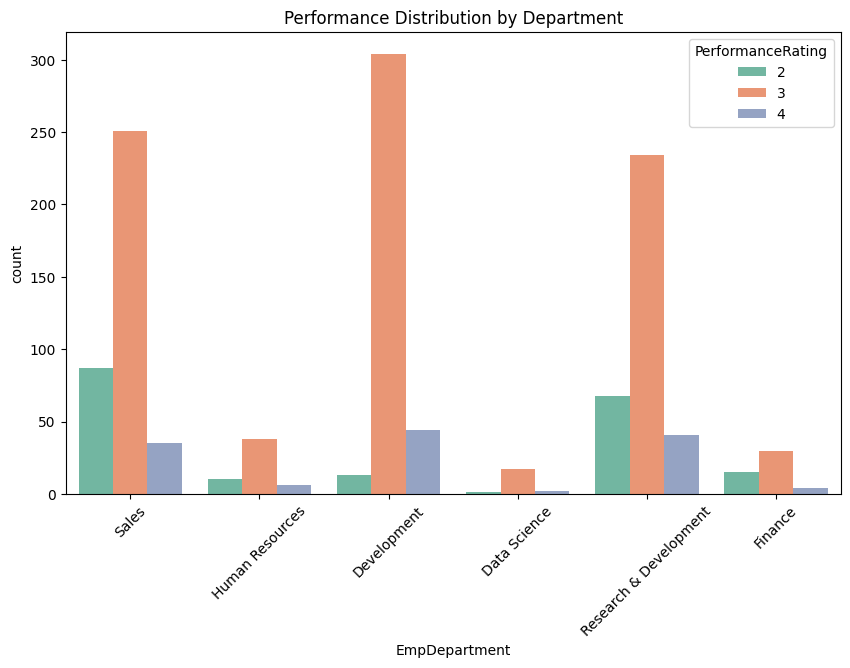

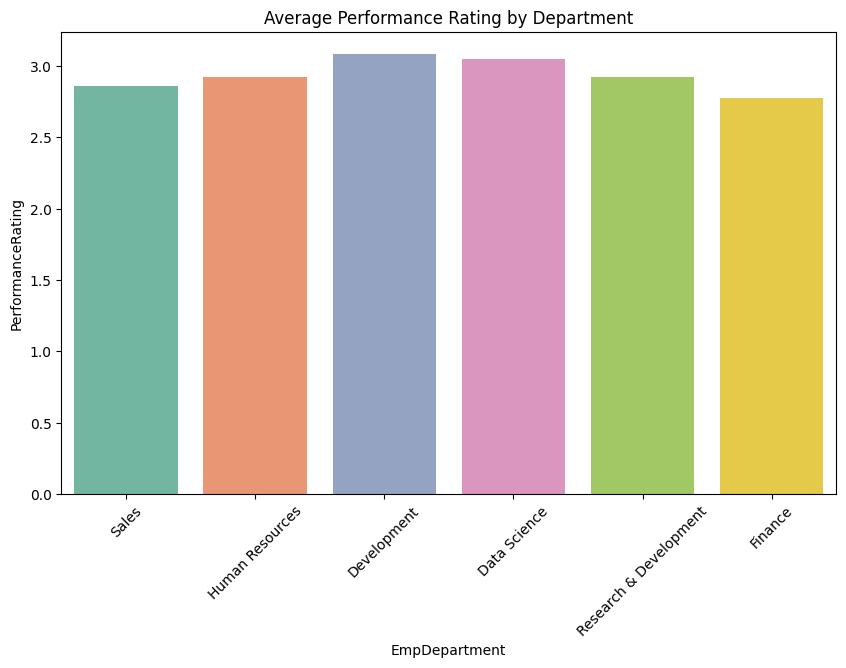

In [ ]:
# Categorical columns (binary and discrete category)
# Countplot (distribution of ratings by department)
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='EmpDepartment', hue='PerformanceRating', palette='Set2')
plt.title('Performance Distribution by Department')
plt.xticks(rotation=45)
plt.show()

# Barplot (average rating per department)
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='EmpDepartment', y='PerformanceRating', palette='Set2', ci=None)
plt.title('Average Performance Rating by Department')
plt.xticks(rotation=45)
plt.show()

 **Goal 1: Department-wise Performances**

 Insight 1: Distribution of Performance Ratings by Department

(From Countplot - Image 1)

- Development, Research & Development, and Sales have the highest employee counts.

- Across all departments, Rating 3 dominates, indicating most employees are rated average.

- Sales and Research & Development have a notable number of employees with Rating 2, signaling underperformance concerns in these departments.

- Development has a strong number of Rating 4 employees, showing some high performers exist here.

 Insight 2: Average Performance Rating by Department

(From Barplot - Image 2)

- Development  (Avg ≈ 3.08) and Data Science (Avg ≈ 3.05) have the highest average ratings, indicating better overall performance in these teams.

- Sales (Avg ≈ 2.87) and Finance (Avg ≈ 2.78) have below-average performance, which may be contributing significantly to the organization's overall performance drop.

- Human Resources and Research & Development sit near the average (~2.9), needing further monitoring.

 Implication: Departments like Sales and Finance may require focused interventions (training, workload assessment, leadership reviews).

#Goal 2 and 4 – Top Features & Recommendations

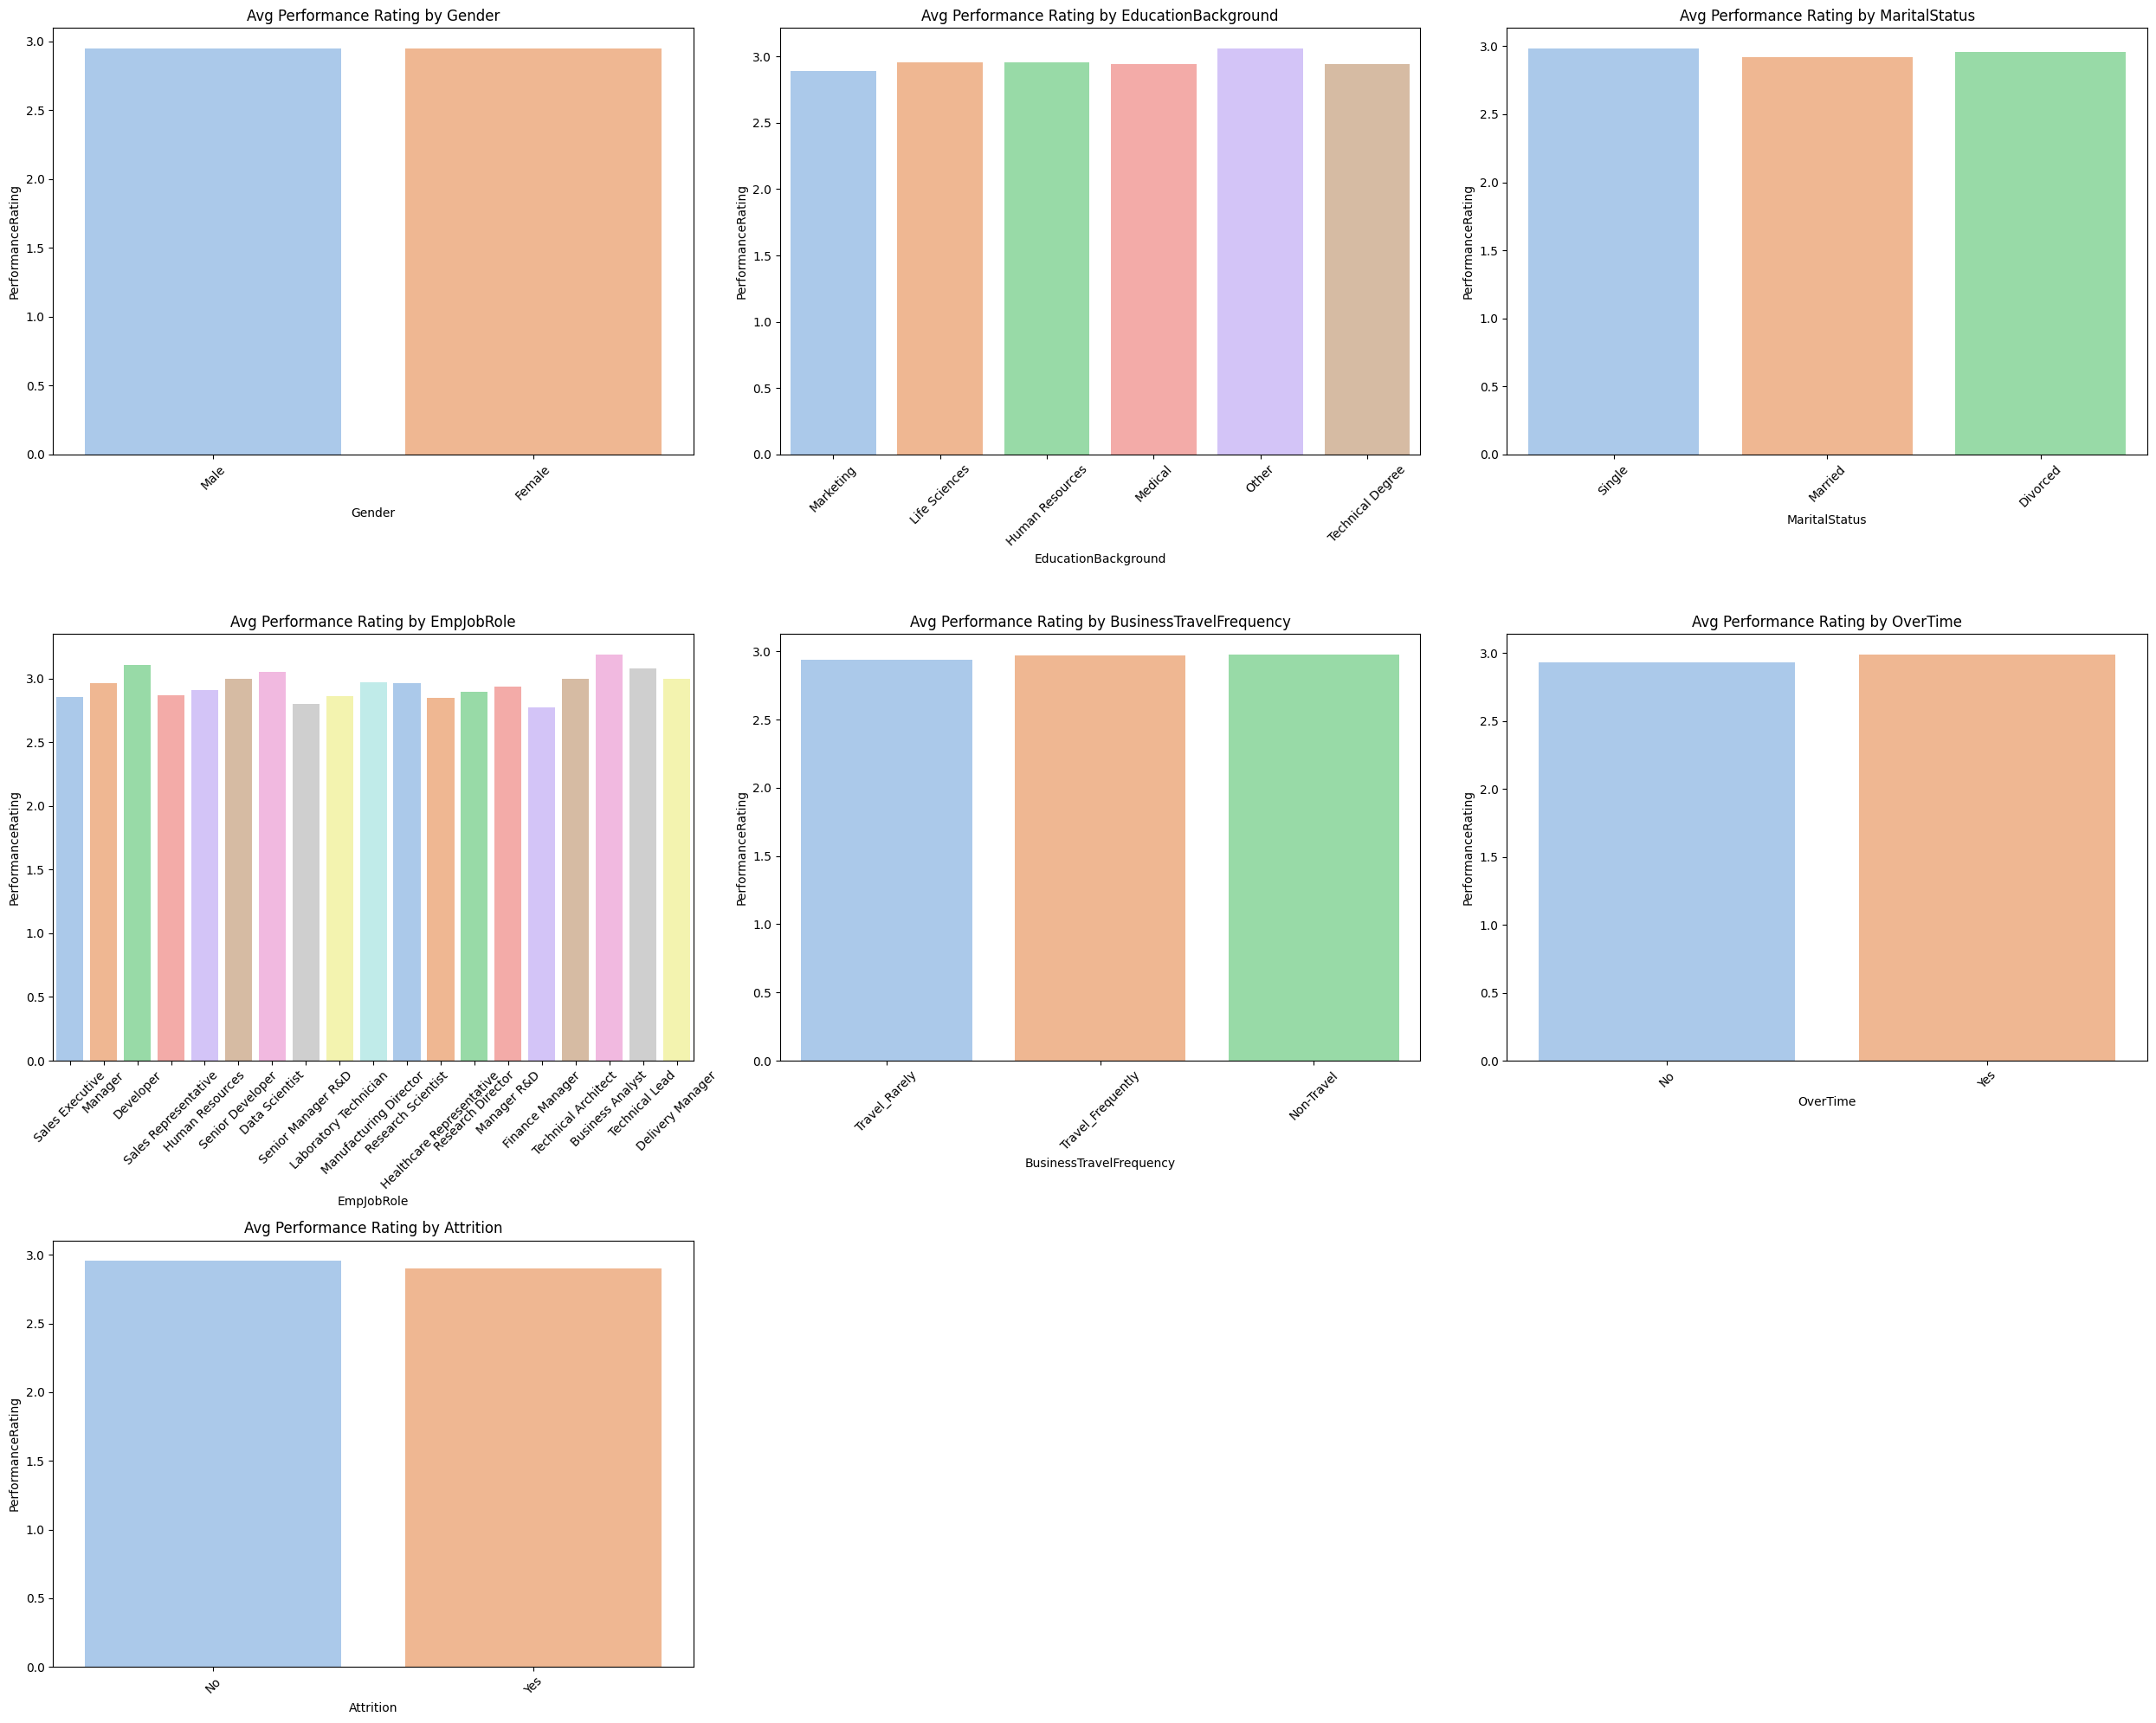

In [ ]:
goal2_cols = [
    'Gender', 'EducationBackground', 'MaritalStatus',
    'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'
]

plt.figure(figsize=(25, 20))
for i, col in enumerate(goal2_cols, 1):
    plt.subplot(3, 3, i)
    sns.barplot(data=data, x=col, y='PerformanceRating', palette='pastel', ci=None)
    plt.title(f'Avg Performance Rating by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **Insights**

**1. Gender**

Insight: Average performance rating is nearly identical between males and females.

Interpretation: No gender bias observed in performance evaluation. Gender is not a differentiating factor for performance.

**2. EducationBackground**

Insight: Employees with Medical and Technical Degree backgrounds show slightly lower average performance, while Life Sciences and Other backgrounds perform marginally better.

Recommendation: Review how education background aligns with job demands—consider additional support or training for underperforming groups.

**3.Martialstatus**

Insight: Single employees have a slightly higher average rating compared to Married and Divorced.

Interpretation: Minimal variation, but may suggest that singles could have more time or fewer external responsibilities affecting work focus.

**4. EmpDepartment**

Insight: Variation is very mild across departments; however, Sales and Human Resources show slightly lower average ratings.

Recommendation: Could explore workload, engagement, or management style in those departments to identify issues.

**5. EmpJobRole**

Insight: Noticeable variation across roles:

Delivery Manager, Healthcare Representative, and Research Director have highest average performance.

Sales Executive, HR, and Manufacturing Director tend to have lower ratings.

Conclusion: Job role is a major influencer—possibly due to expectations, metrics, or team support levels.

**6. BusinessTravelFrequency**

Insight: Employees who travel Rarely and Frequently have similar average ratings, but Non-Travelers show slightly lower performance.

Interpretation: Travel may expose employees to broader challenges or opportunities, enhancing performance slightly.

**7. OverTime**

Insight: Employees working OverTime have a noticeably higher average performance than those who don't.

Conclusion: Strong positive indicator—high-performing employees may be more dedicated or engaged, or high performers are expected to work more overtime.

**8. Attrition**

Insight: No significant difference in performance between those who left and those who stayed.

Interpretation: Performance alone is not predictive of attrition; consider including satisfaction or work-life balance metrics.

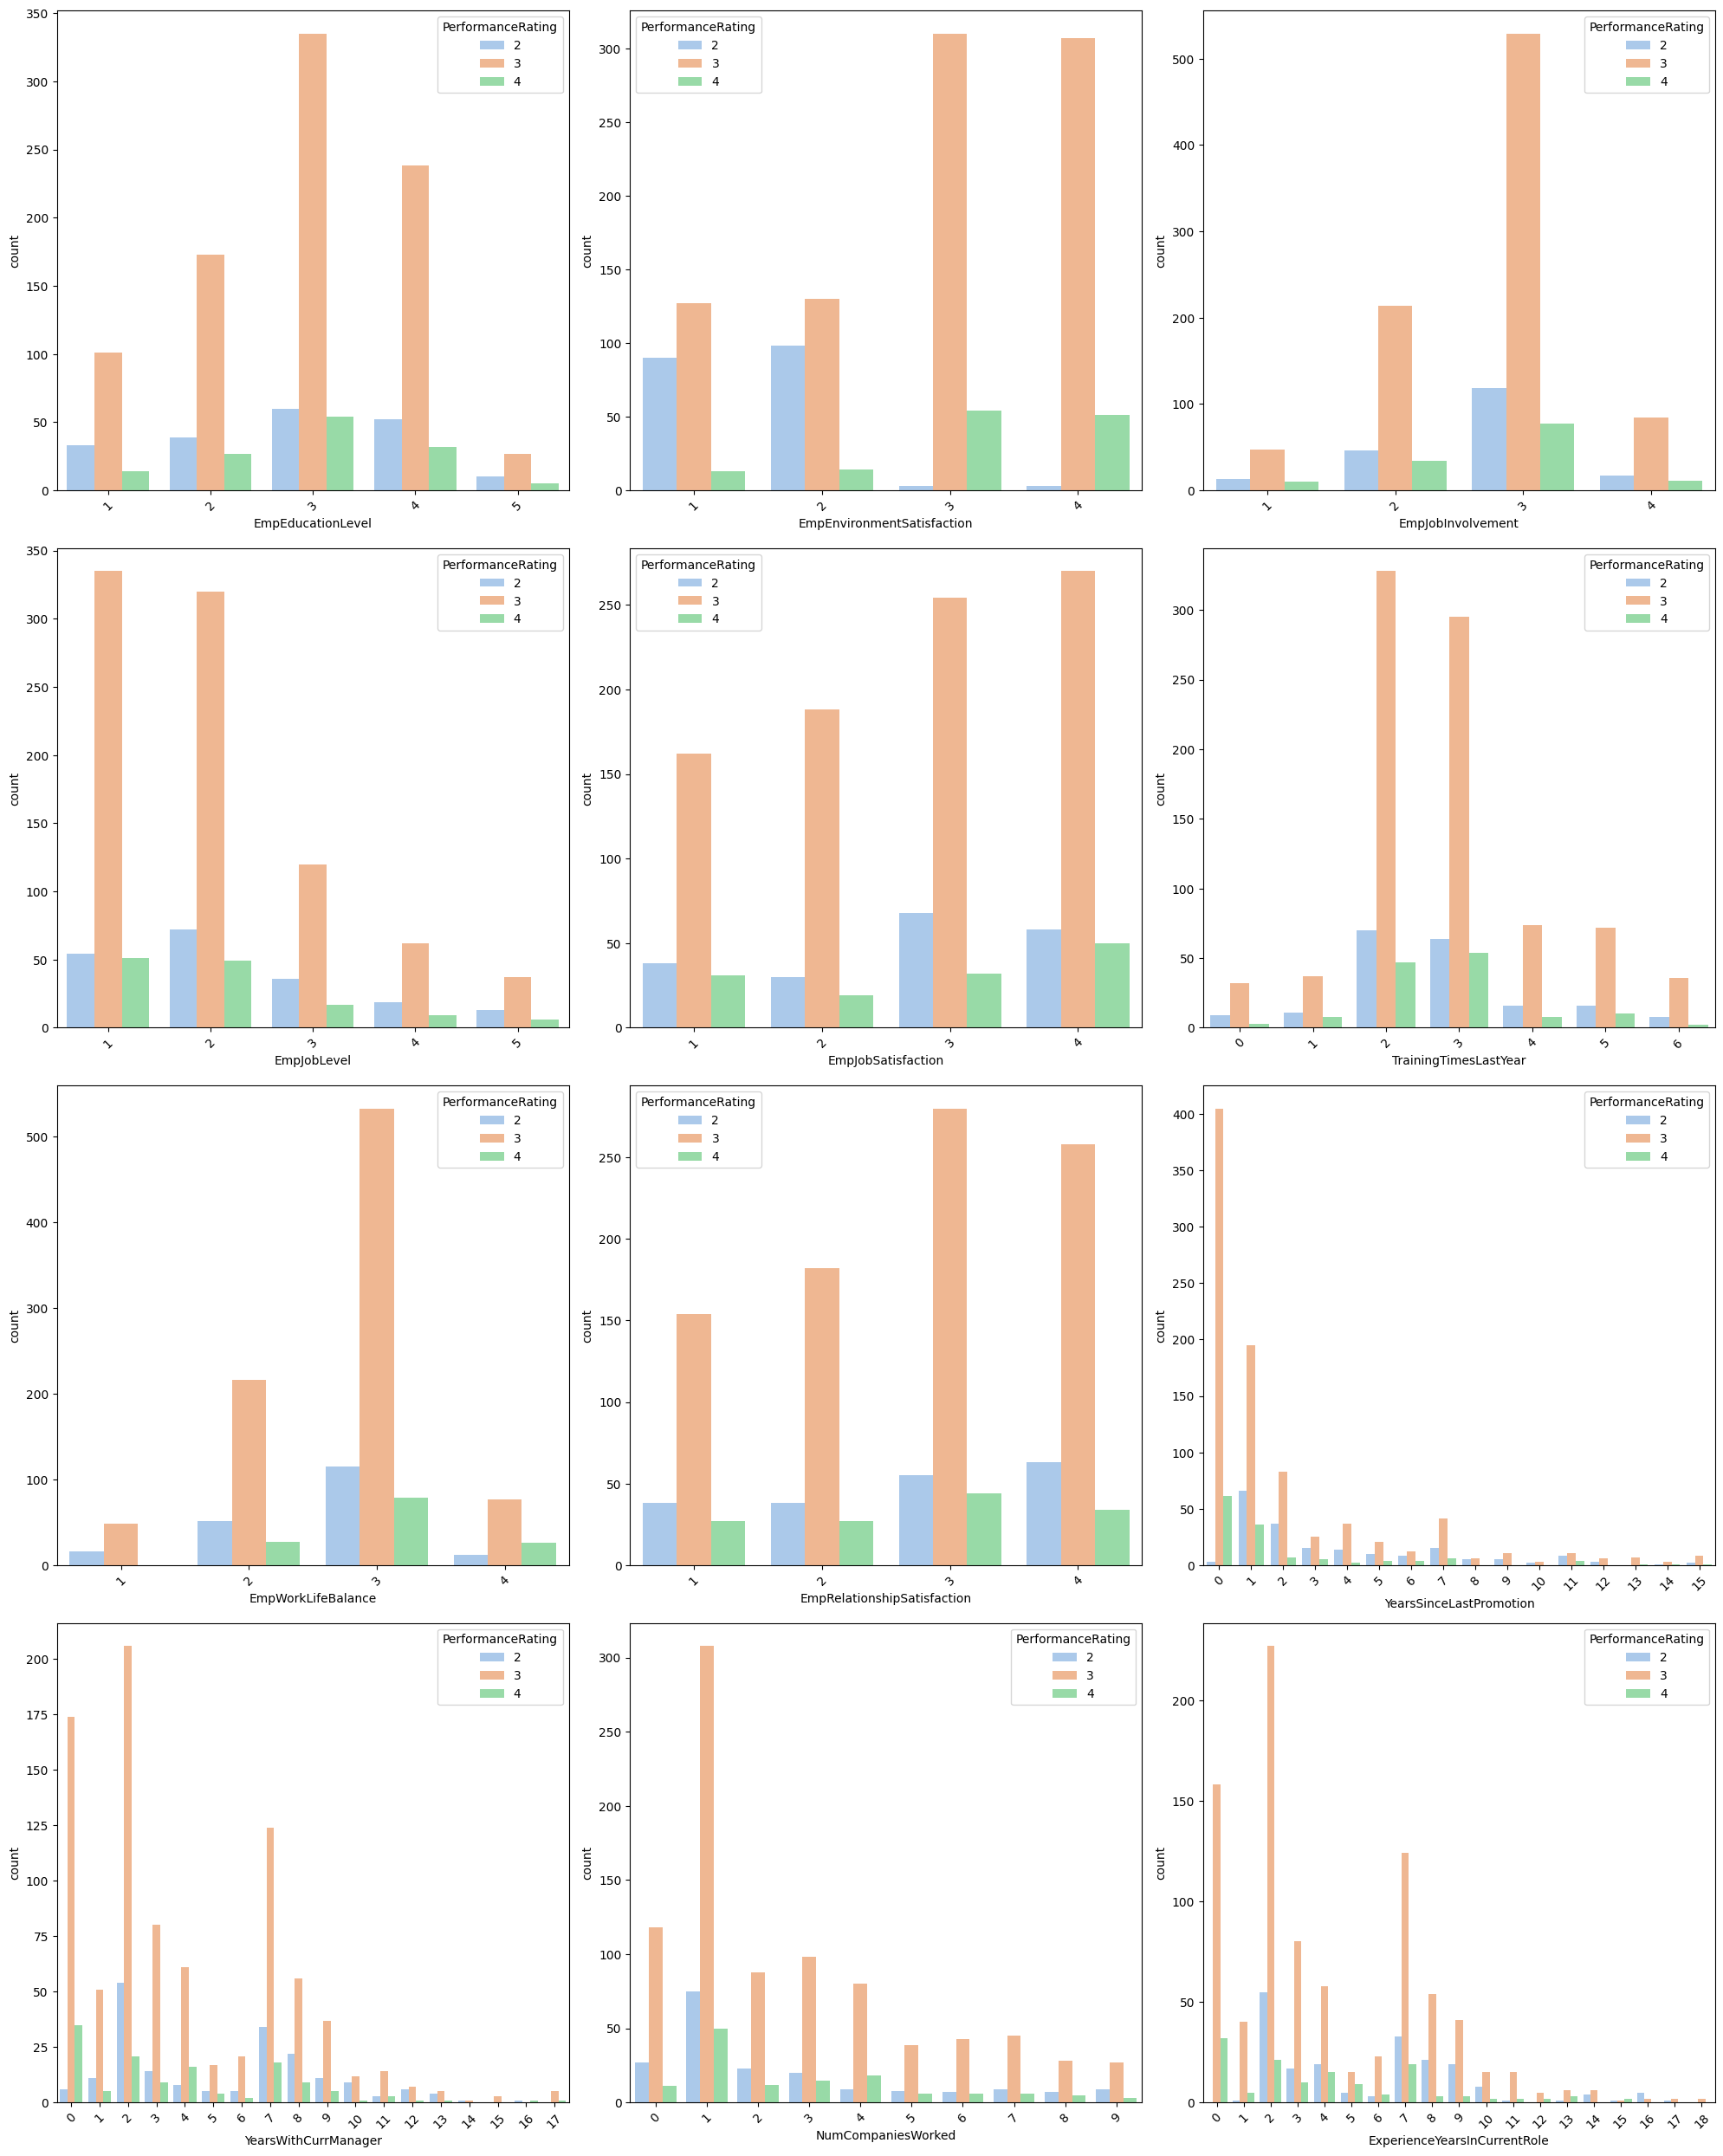

In [ ]:
# Countplot for Discrete Numerical Features

# List of discrete numerical columns
discrete_cols = ['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
                      'TrainingTimesLastYear','EmpWorkLifeBalance','EmpRelationshipSatisfaction','YearsSinceLastPromotion',
                      'YearsWithCurrManager','NumCompaniesWorked','ExperienceYearsInCurrentRole']

# Plotting
plt.figure(figsize=(20, 25))
for i, col in enumerate(discrete_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=data, x=col, hue='PerformanceRating', palette="pastel")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**1)EmpEducationLevel**:

Rating 3 dominates across all education levels.

No strong trend indicating higher education leads to better performance.

**2)EmpEnvironmentSatisfaction**:

Higher satisfaction levels (3 and 4) have slightly more instances of performance rating 4.

However, rating 3 remains the most frequent across all levels.

**3)EmpJobInvolvement**:

Job involvement level 3 shows a slight increase in rating 4.

Lower involvement (level 2) associates with fewer high performers.

**4)EmpJobLevel**:

Higher job levels (4 and 5) have slightly more employees rated 4.

Still, rating 3 is common across all job levels.

**5)EmpJobSatisfaction**:

Slight upward trend: levels 3 and 4 show more rating 4s.

Indicates a mild positive link between job satisfaction and performance.

**6)TrainingTimesLastYear**:

No clear trend observed.

Slight increase in rating 4 for those with 2–4 training instances.

**7)EmpWorkLifeBalance**:

Level 3 shows a small rise in rating 4 counts.

Better balance might support better performance, but not conclusive.

**8)EmpRelationshipSatisfaction**:

Levels 3 and 4 show more rating 4s.

Indicates a potential positive link with performance.

**9)YearsSinceLastPromotion**:

Employees with 0–2 years since last promotion have more rating 4s.

Longer gap since last promotion might link to lower performance.

**10)YearsWithCurrManager**:

Most employees are clustered between 0–5 years.

Rating 4 slightly more common in the 2–4 year range.

**11)NumCompaniesWorked**:

Employees with fewer prior companies (0–2) show more high performance ratings.

Suggests job stability may contribute positively to performance.

**12)ExperienceInCurrentDomain**:

Rating 4 is more frequent in employees with 4–8 years of domain experience.

Too little or too much domain experience doesn't show strong performance rating patterns.

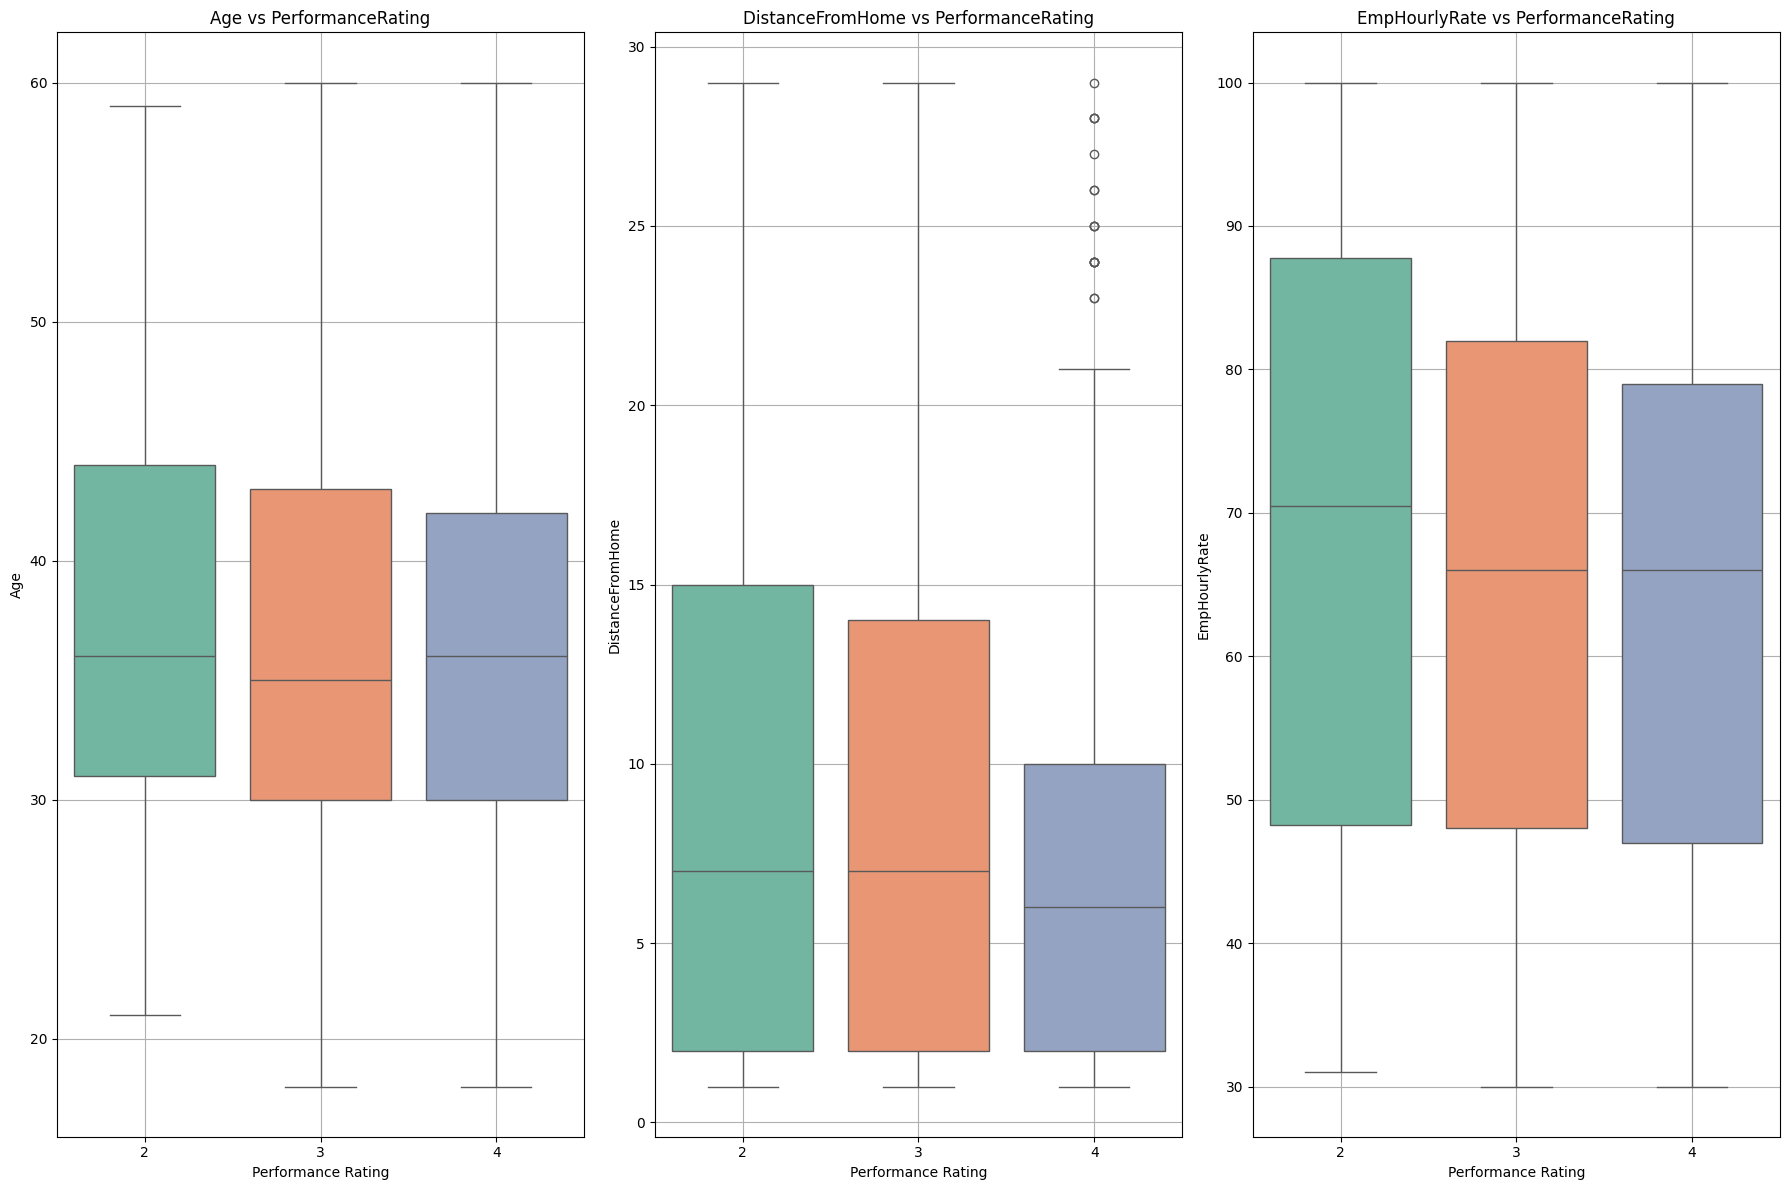

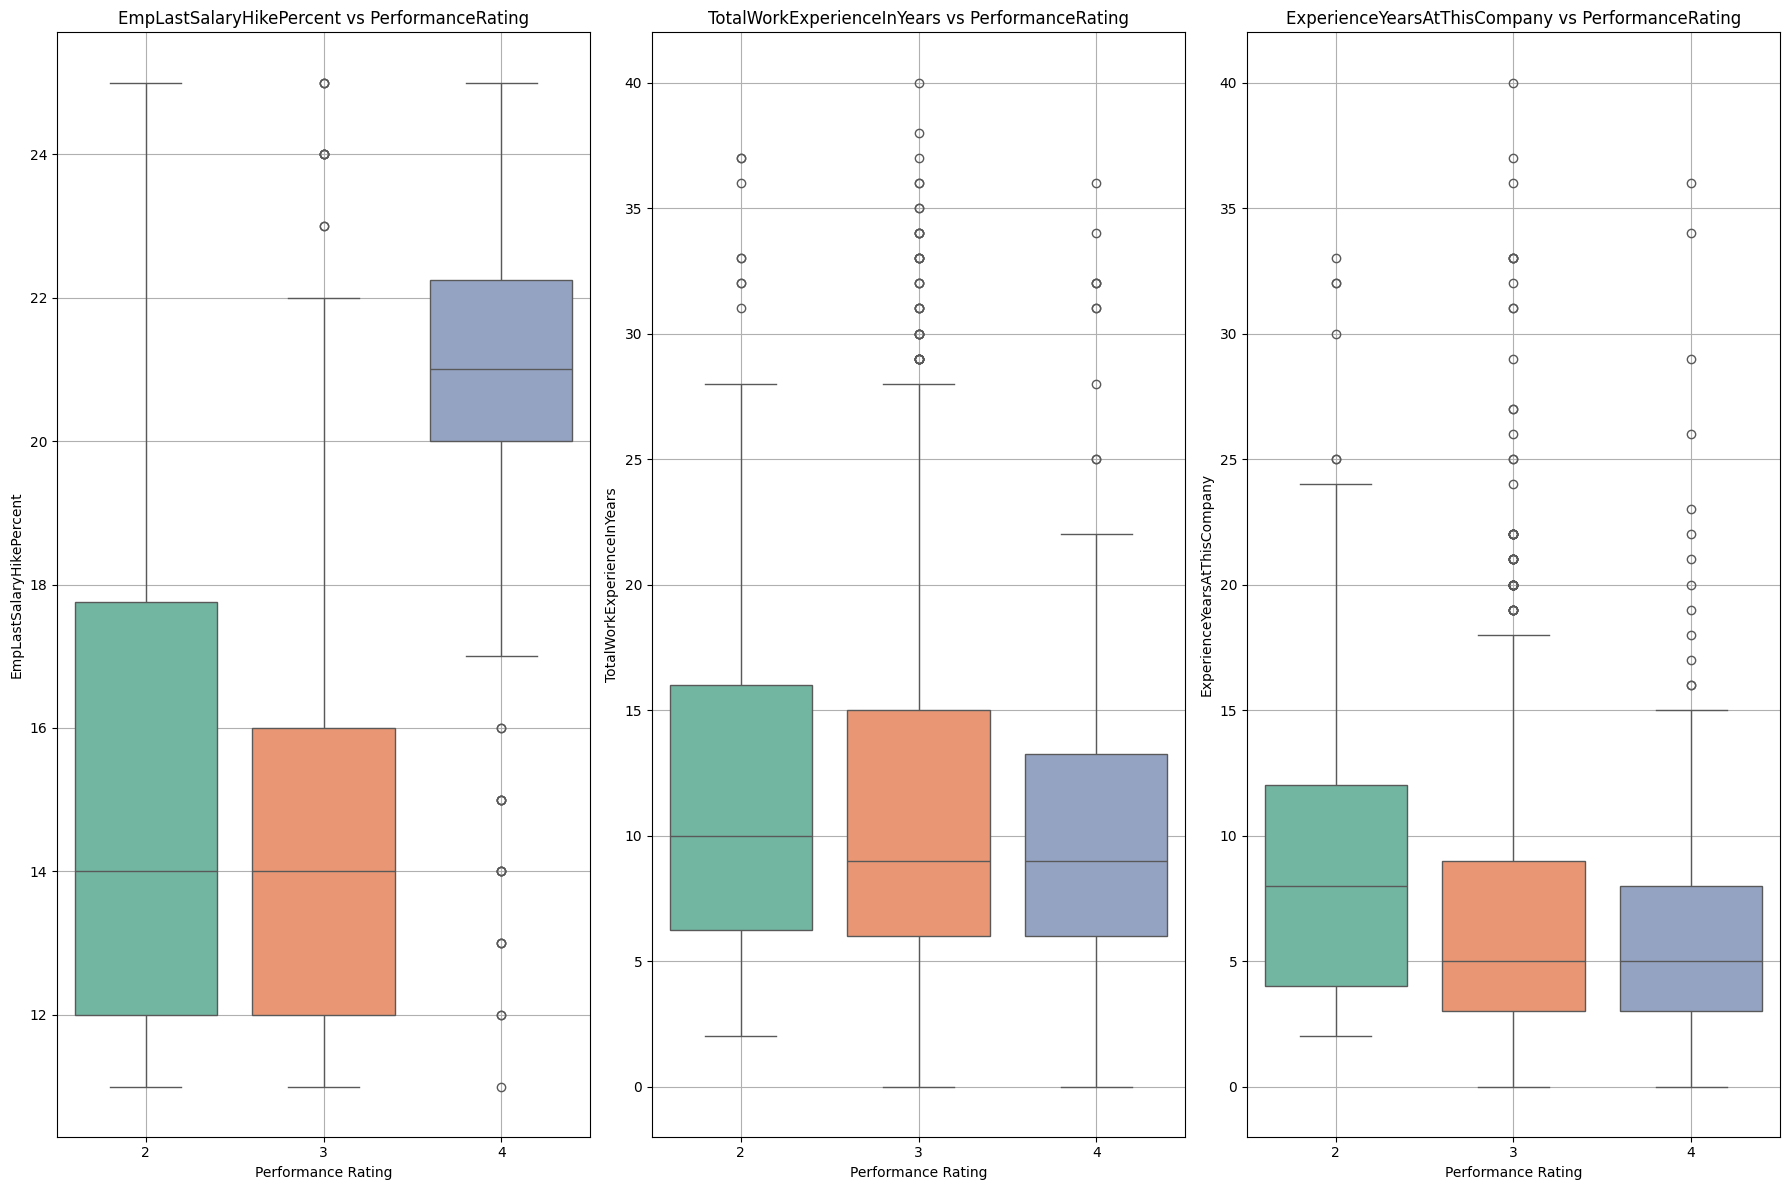

In [ ]:
#creating Boxplot for Continuous numerical columns
# List of continuous columns
continuous_col_names = [
    'Age',
    'DistanceFromHome',
    'EmpHourlyRate',
    'EmpLastSalaryHikePercent',
    'TotalWorkExperienceInYears',
    'ExperienceYearsAtThisCompany'
]

# Split into 2 plots with 3 boxplots each
for j in range(0, len(continuous_col_names), 3):
    plt.figure(figsize=(18, 12))
    for i, col in enumerate(continuous_col_names[j:j+3], 1):
        plt.subplot(1, 3, i)
        sns.boxplot(data=data, x='PerformanceRating', y=col, palette='Set2')
        plt.title(f'{col} vs PerformanceRating')
        plt.xlabel('Performance Rating')
        plt.ylabel(col)
        plt.grid(True)
    plt.tight_layout()
    plt.show()

**1) DistanceFromHome vs PerformanceRating**

Trend: Employees with Rating 4 have a lower median distance from home.

Rating 2 employees show the highest distance range, indicating longer commutes.

Insight:

- Longer commutes may reduce energy and productivity, leading to poor performance.
- Consider flexible/hybrid work policies or relocation support.

**2) EmpHourlyRate vs PerformanceRating**

Trend: Hourly pay is not a clear driver of performance.

All performance levels have similar ranges of hourly rates.

Insight:

- Higher pay does not necessarily lead to higher performance.
- Intrinsic motivation and role fit might matter more than monetary rewards.

**3) Age vs PerformanceRating**

Trend: All age groups are represented across ratings.

Slightly lower performance seen in younger employees, especially Rating 2.

Insight:

- Younger employees may need more guidance or onboarding.
- Experience and maturity could contribute positively to performance.

**4) EmpLastSalaryHikePercent vs PerformanceRating**

Trend: High performers (Rating 4) receive higher salary hikes.

Rating 2 employees have consistently lower hikes.

Insight:

- Performance-based incentives (hikes) align well with outcomes.
- Recognizing contributions through compensation can encourage better performance.

**5) TotalWorkExperienceInYears vs PerformanceRating**

Trend: High performers surprisingly have lower overall experience.

Rating 2/3 employees show a wider and higher range of experience.

Insight:

- Fresh talent with focused skills may be performing better.
- Past experience doesn’t always translate to current job success.

**6) ExperienceYearsAtThisCompany vs PerformanceRating**

Trend: Shorter tenure employees are more likely to be high performers (Rating 4).

Longer-tenured employees tend to score lower (Ratings 2 and 3).

Insight:

- Long-serving employees may experience stagnation or lack of motivation.
- Consider job rotation, career growth paths, or re-skilling initiatives.

# **Summarizing Project Goals:**

# **1)Goal 1-Department-Wise Performance**

- Development leads with the highest average rating (~3.1), followed closely by Data Science.

- Sales, R&D, and HR sit in the middle (~2.8–2.9).

- Finance trails (~2.75).

**Actionable**: Focus initial interventions on Finance and Sales to lift their average scores.

# **2) Goal 2 -Top 3 Important Factors Affecting Performance**

After inspecting 12 numerical & categorical features plus the six continuous variables earlier, the strongest drivers are:

Rank	Feature	Why it matters

1)	DistanceFromHome	Rating 4 employees live much closer; long commutes → fatigue.

2)	EmpLastSalaryHikePercent	Rating 4 → highest hikes; Rating 2 → lowest. Recognition matters.

3)	JobSatisfaction	Satisfaction 4 has disproportionately more top performers; low satisfaction → poor ratings.

Honorable mention: ExperienceYearsAtThisCompany (long tenure correlates with slight drop), EnvironmentSatisfaction, EmpWorkLifeBalance—all show clear monotonic trends but slightly weaker than the top three.

# **4)Goal 4- Recommendations to Improve Performance**

1- Reduce Commute Burden

  - Offer flex/hybrid schedules, remote days, or transport stipends.

2- Tie Hikes to Outcomes

  - Roll out transparent, timely salary-hike programs linked to quarterly goals.

3- Boost Job Satisfaction

  - Run targeted pulse surveys, improve career-path clarity, and enhance manager coaching.

4- Re-engage Long-Tenured Staff

  - Introduce role rotations, stretch assignments, or re-skilling workshops.

# Data Preprocessing

In [ ]:
data.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [ ]:
data.duplicated().sum()

np.int64(0)

# Check for outliers

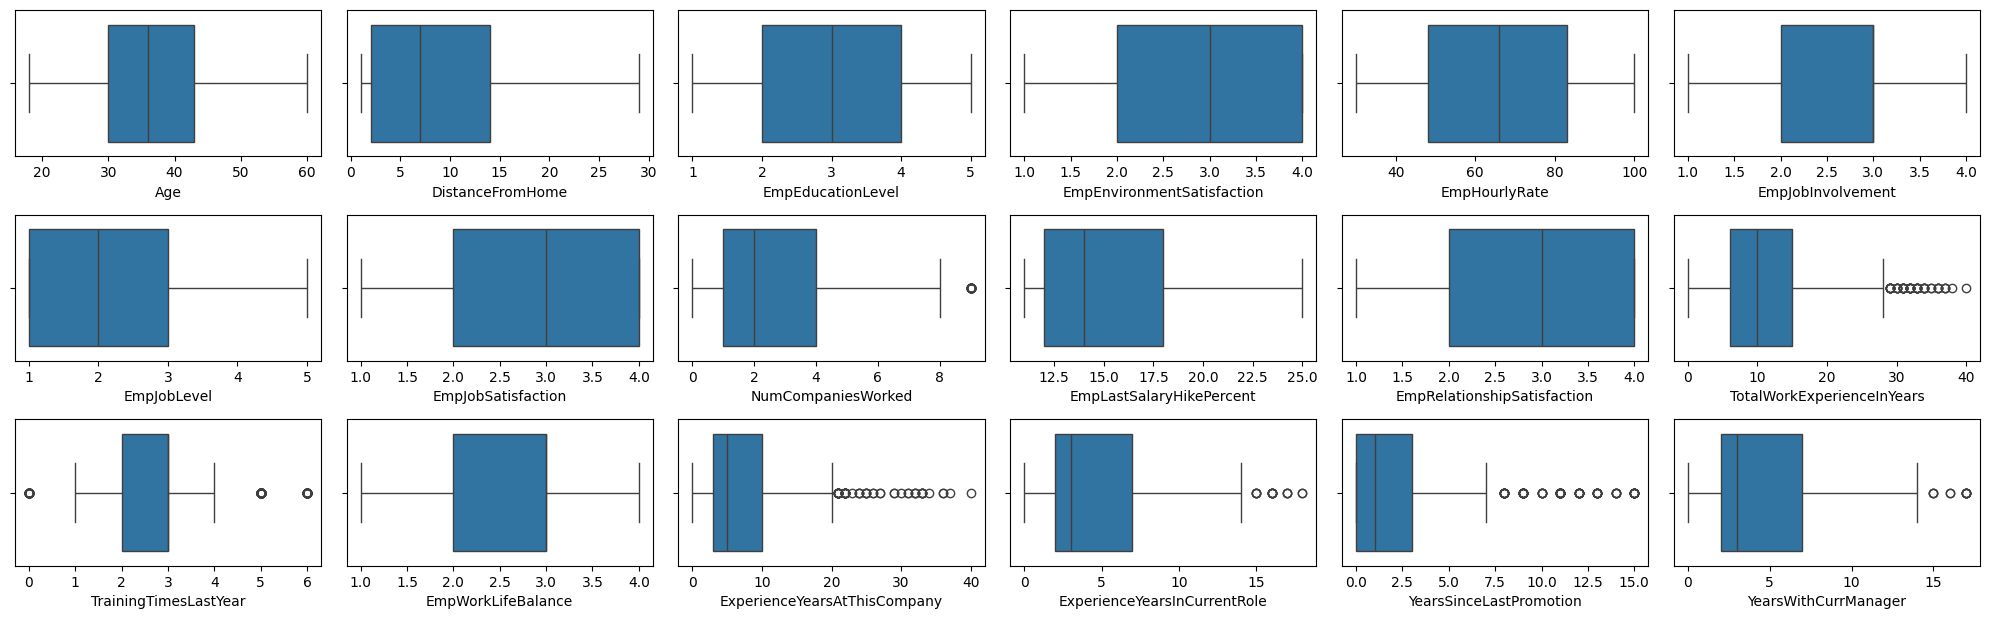

In [ ]:
# List of numerical columns
columns_to_handle_outliers = ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
                               'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction',
                               'NumCompaniesWorked','EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
                               'TotalWorkExperienceInYears', 'TrainingTimesLastYear','EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
                               'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']


# Plotting boxplots for all numerical columns
plt.figure(figsize=(20, 12))
for i, col in enumerate(columns_to_handle_outliers, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(x=data[col])

plt.tight_layout()
plt.show()

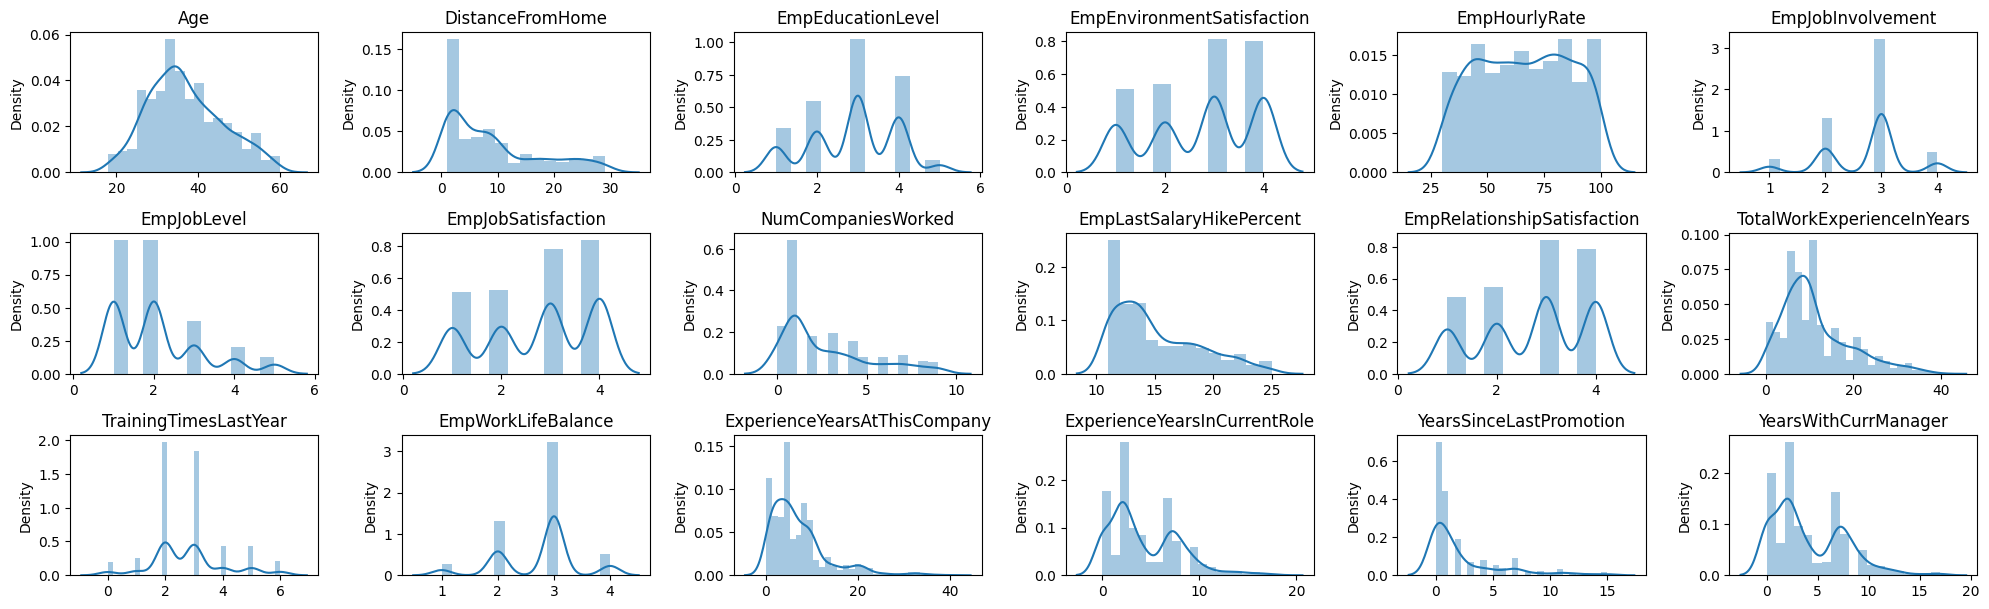

In [ ]:
#creating distplot for numerical columns to know which rule to use whether IQR or 3 sigma
plt.figure(figsize=(20, 12))
for i, col in enumerate(columns_to_handle_outliers, 1):
    plt.subplot(6, 6, i)  # 6x6 grid of subplots
    sns.distplot(x=data[col])  # distplot for each column
    plt.title(col)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
# First quantile (Q1)
Q1 = data[num_col].quantile(0.25)  # Use num_col to select numerical columns
# Third quantile (Q3)
Q3 = data[num_col].quantile(0.75)  # Use num_col to select numerical columns
# IQR value
IQR = Q3 - Q1
# Getting the limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
# Sum of outliers
# Use num_col to select numerical columns for outlier calculation
outliers_count = ((data[num_col] > upper_limit) | (data[num_col] < lower_limit)).sum()
# Percentage of outliers
outliers_percentage = (outliers_count / len(data)) * 100
print('Sum of Outliers: ', outliers_count)
print('Percentage of Outliers:', outliers_percentage)

filtered_columns = outliers_percentage[(outliers_percentage > 0) & (outliers_percentage < 5)]

if filtered_columns.any():
    print("Columns that need to be handled:", filtered_columns)

Sum of Outliers:  Age                               0
DistanceFromHome                  0
EmpEducationLevel                 0
EmpEnvironmentSatisfaction        0
EmpHourlyRate                     0
EmpJobInvolvement                 0
EmpJobLevel                       0
EmpJobSatisfaction                0
NumCompaniesWorked               39
EmpLastSalaryHikePercent          0
EmpRelationshipSatisfaction       0
TotalWorkExperienceInYears       51
TrainingTimesLastYear           188
EmpWorkLifeBalance                0
ExperienceYearsAtThisCompany     56
ExperienceYearsInCurrentRole     16
YearsSinceLastPromotion          88
YearsWithCurrManager             11
PerformanceRating               326
dtype: int64
Percentage of Outliers: Age                              0.000000
DistanceFromHome                 0.000000
EmpEducationLevel                0.000000
EmpEnvironmentSatisfaction       0.000000
EmpHourlyRate                    0.000000
EmpJobInvolvement                0.000000
EmpJobLev

# **Columns that need to handle outliers are below**

TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsWithCurrManager,NumCompaniesWorked,TrainingTimesLastYear,YearsSinceLastPromotion

In [ ]:
outlier=['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
         'YearsWithCurrManager', 'NumCompaniesWorked', 'TrainingTimesLastYear',
         'YearsSinceLastPromotion']


for col in outlier:

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    lower_count = len(data[data[col] < lower_limit])
    upper_count = len(data[data[col] > upper_limit])
    total = len(data)

    lower_percent = lower_count / total * 100
    upper_percent = upper_count / total * 100

    print(f"{col}:")
    print(f"  Lower limit: {lower_limit}")
    print(f"  Upper limit: {upper_limit}")
    print(f"  Lower outliers: {lower_count} ({lower_percent:.2f}%)")
    print(f"  Upper outliers: {upper_count} ({upper_percent:.2f}%)\n")


    # Cap the outliers to the IQR limits
    data[col] = np.where(data[col] < lower_limit, lower_limit, data[col])
    data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

TotalWorkExperienceInYears:
  Lower limit: -7.5
  Upper limit: 28.5
  Lower outliers: 0 (0.00%)
  Upper outliers: 51 (4.25%)

ExperienceYearsAtThisCompany:
  Lower limit: -7.5
  Upper limit: 20.5
  Lower outliers: 0 (0.00%)
  Upper outliers: 56 (4.67%)

ExperienceYearsInCurrentRole:
  Lower limit: -5.5
  Upper limit: 14.5
  Lower outliers: 0 (0.00%)
  Upper outliers: 16 (1.33%)

YearsWithCurrManager:
  Lower limit: -5.5
  Upper limit: 14.5
  Lower outliers: 0 (0.00%)
  Upper outliers: 11 (0.92%)

NumCompaniesWorked:
  Lower limit: -3.5
  Upper limit: 8.5
  Lower outliers: 0 (0.00%)
  Upper outliers: 39 (3.25%)

TrainingTimesLastYear:
  Lower limit: 0.5
  Upper limit: 4.5
  Lower outliers: 44 (3.67%)
  Upper outliers: 144 (12.00%)

YearsSinceLastPromotion:
  Lower limit: -4.5
  Upper limit: 7.5
  Lower outliers: 0 (0.00%)
  Upper outliers: 88 (7.33%)



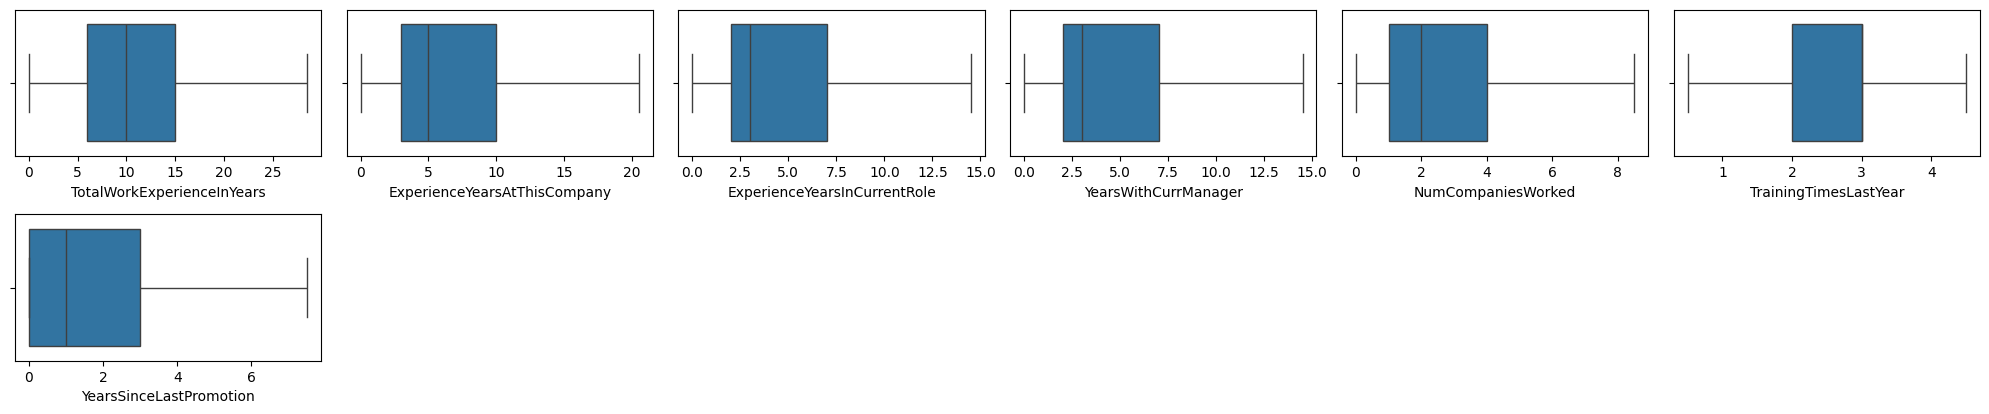

In [ ]:
# List of numerical columns
after_outlier =['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
                'YearsWithCurrManager', 'NumCompaniesWorked', 'TrainingTimesLastYear',
                'YearsSinceLastPromotion']

# Plotting boxplots for all numerical columns
plt.figure(figsize=(20, 12))
for i, col in enumerate(after_outlier, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(x=data[col])

plt.tight_layout()
plt.show()

# Convert Categorical column to numerical column

In [ ]:
cat_columns = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
               'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

In [ ]:
#Binary Encoding Using Mapping
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})


# Ordinal Encoding (Manual)
data['BusinessTravelFrequency'] = data['BusinessTravelFrequency'].map({'Non-Travel': 0,'Travel_Rarely': 1,'Travel_Frequently': 2})
data.head(3)

Age  Gender EducationBackground MaritalStatus EmpDepartment  \
0   32       1           Marketing        Single         Sales   
1   47       1           Marketing        Single         Sales   
2   40       1       Life Sciences       Married         Sales   

        EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive                        1                10   
1  Sales Executive                        1                14   
2  Sales Executive                        2                 5   

   EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
0                  3                           4  ...   
1                  4                           4  ...   
2                  4                           4  ...   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                        10.0   
1                            4                        20.0   
2                            3                        20.0   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                    2.0                   2                          10.0   
1                    2.0                   3                           7.0   
2                    2.0                   3                          18.0   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                           7.0                      0.0   
1                           7.0                      1.0   
2                          13.0                      1.0   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                   8.0          0                  3  
1                   7.0          0                  3  
2                  12.0          0                  4  

[3 rows x 27 columns]

In [ ]:
# MaritalStatus → Simple Ordinal Mapping
data['MaritalStatus'] = data['MaritalStatus'].map({'Divorced': 0,'Single': 1,'Married': 2})
# EducationBackground → Manual Label Mapping
data['EducationBackground'] = data['EducationBackground'].map({'Human Resources': 0,'Life Sciences': 1,
                                                               'Marketing': 2,'Medical': 3,'Other': 4,'Technical Degree': 5})

# EmpDepartment → Manual Label Mapping
data['EmpDepartment'] = data['EmpDepartment'].map({'Data Science': 0,'Development': 1,'Finance': 2,'Human Resources': 3,
                                                   'Research & Development': 4,'Sales': 5})

In [ ]:
# Frequency Encoding
role_freq = data['EmpJobRole'].value_counts(normalize=True)  # ← gives percentage
data['EmpJobRole'] = data['EmpJobRole'].map(role_freq)
data.head(5)

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              1              5      0.2250   
1   47       1                    2              1              5      0.2250   
2   40       1                    1              2              5      0.2250   
3   41       1                    0              0              3      0.0425   
4   60       1                    2              1              5      0.2250   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        1                10                  3   
1                        1                14                  4   
2                        2                 5                  4   
3                        1                10                  4   
4                        1                16                  4   

   EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
0                           4  ...                            4   
1                           4  ...                            4   
2                           4  ...                            3   
3                           2  ...                            2   
4                           1  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                        10.0                    2.0                   2   
1                        20.0                    2.0                   3   
2                        20.0                    2.0                   3   
3                        23.0                    2.0                   2   
4                        10.0                    1.0                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                          10.0                           7.0   
1                           7.0                           7.0   
2                          18.0                          13.0   
3                          20.5                           6.0   
4                           2.0                           2.0   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                      0.0                   8.0          0                  3  
1                      1.0                   7.0          0                  3  
2                      1.0                  12.0          0                  4  
3                      7.5                   6.0          0                  3  
4                      2.0                   2.0          0                  3  

[5 rows x 27 columns]

#Feature Engineering

In [ ]:
plt.figure(figsize=(200,200))
sns.heatmap(data.drop('PerformanceRating', axis=1).corr(), annot=True, cmap="RdYlGn", annot_kws={"size":35})

<Axes: >

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Absolute correlation matrix (drop self-correlation)
corr_pairs = corr_matrix.abs().unstack()
corr_pairs = corr_pairs[corr_pairs < 1.0]  # Remove self-correlations (1.0)
corr_pairs = corr_pairs.drop_duplicates().sort_values(ascending=False)

# Set threshold
threshold = 0.8
high_corr = corr_pairs[corr_pairs > threshold]

print(" Highly Correlated Feature Pairs (|r| > 0.8):\n")
print(high_corr)

 Highly Correlated Feature Pairs (|r| > 0.8):

ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole    0.818888
                              YearsWithCurrManager            0.809030
dtype: float64


# Observation

ExperienceYearsAtThisCompany shows high correlation with both ExperienceYearsInCurrentRole and YearsWithCurrManager, indicating redundancy, so it can be safely dropped to avoid multicollinearity.

In [ ]:
# Drop highly correlated feature
data.drop('ExperienceYearsAtThisCompany', axis=1, inplace=True)

In [ ]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'PerformanceRating'],
      dtype='object')

#Model Creation

In [ ]:
x=data.drop('PerformanceRating', axis=1)
y=data['PerformanceRating']

In [ ]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

#Scaling
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# checking the shape of train and test data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 25)
(240, 25)
(960,)
(240,)


<Axes: xlabel='PerformanceRating', ylabel='count'>

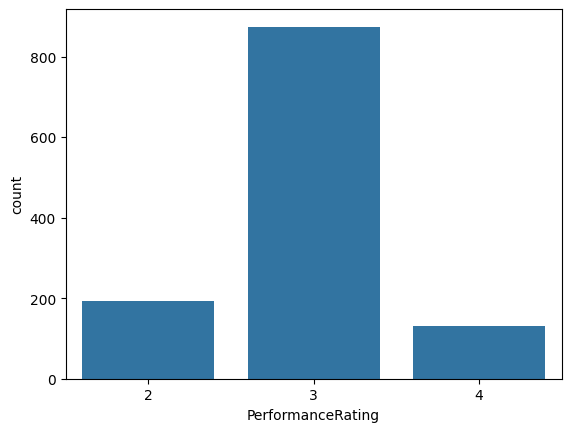

In [ ]:
# check whether SMOTE need to be done or not using countplot for target
sns.countplot(x=data.PerformanceRating)

In [ ]:
from collections import Counter
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
x_smote, y_smote = smk.fit_resample(x_train_scaled, y_train)

In [ ]:
print("actual",Counter(y_train))
print("after smotetomek",Counter(y_smote))

actual Counter({3: 690, 2: 165, 4: 105})
after smotetomek Counter({2: 690, 3: 690, 4: 690})


In [ ]:
print(y_smote.value_counts())  # Should be balanced after SMOTE

PerformanceRating
2    690
3    690
4    690
Name: count, dtype: int64


#Model Building

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Step 1: Train Logistic Regression on SMOTE-balanced, scaled data
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_smote, y_smote)

# 1. Evaluation on Original Training Data (Real Distribution)
print("\n========== Evaluation on Original Training Data (Real Distribution) ==========")
y_pred_train_real = lr.predict(x_train_scaled)
acc_train_real = accuracy_score(y_train, y_pred_train_real)
prec_train_real = precision_score(y_train, y_pred_train_real, average='weighted')
recall_train_real = recall_score(y_train, y_pred_train_real, average='weighted')
f1_train_real = f1_score(y_train, y_pred_train_real, average='weighted')
report_train_real = classification_report(y_train, y_pred_train_real)


print("Accuracy:", acc_train_real)
print("Precision:", prec_train_real)
print("Recall:", recall_train_real)
print("F1-Score:", f1_train_real)
print("Classification Report:\n", report_train_real)

# 2. Evaluation on Test Data (Real-World Performance)
print("\n========== Evaluation on Test Data (Real-World Performance) ==========")
y_pred_test= lr.predict(x_test_scaled)

acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')
report_test = classification_report(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)

print("Accuracy:", acc_test)
print("Precision:", prec_test)
print("Recall:", recall_test)
print("F1-Score:", f1_test)
print("Classification Report:\n", report_test)
print("Confusion Matrix:\n", cm_test)

# 3. Evaluation on SMOTE-balanced Training Data (Overfitting Check)
print("\n========== Evaluation on SMOTE-balanced Training Data (Overfitting Check) ==========")
y_pred_train_smote = lr.predict(x_smote)
acc_train_smote = accuracy_score(y_smote, y_pred_train_smote)
prec_train_smote = precision_score(y_smote, y_pred_train_smote, average='weighted')
recall_train_smote = recall_score(y_smote, y_pred_train_smote, average='weighted')
f1_train_smote = f1_score(y_smote, y_pred_train_smote, average='weighted')

print("Accuracy:", acc_train_smote)
print("Precision:", prec_train_smote)
print("Recall:", recall_train_smote)
print("F1-Score:", f1_train_smote)


========== Evaluation on Original Training Data (Real Distribution) ==========
Accuracy: 0.759375
Precision: 0.8286147262577347
Recall: 0.759375
F1-Score: 0.7738085793845974
Classification Report:
               precision    recall  f1-score   support

           2       0.55      0.84      0.66       165
           3       0.95      0.73      0.82       690
           4       0.50      0.85      0.63       105

    accuracy                           0.76       960
   macro avg       0.67      0.80      0.71       960
weighted avg       0.83      0.76      0.77       960


========== Evaluation on Test Data (Real-World Performance) ==========
Accuracy: 0.7375
Precision: 0.8197173761198151
Recall: 0.7375
F1-Score: 0.7580611021166876
Classification Report:
               precision    recall  f1-score   support

           2       0.43      0.83      0.56        29
           3       0.93      0.72      0.81       184
           4       0.49      0.74      0.59        27

    accuracy   

#ROC CURVE

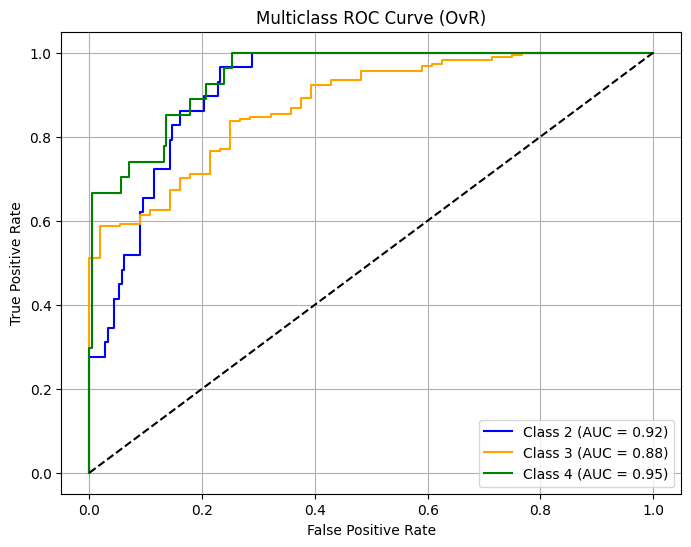

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


# Binarize the multiclass labels (e.g., 2, 3, 4)
y_test_bin = label_binarize(y_test, classes=[2, 3, 4])
y_proba = lr.predict_proba(x_test_scaled)  # shape: (n_samples, n_classes)

fpr = {}
tpr = {}
roc_auc = {}

# Plot ROC curve for each class
for i in range(y_proba.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all
plt.figure(figsize=(8,6))
colors = ['blue', 'orange', 'green']
for i, color in zip(range(y_proba.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f"Class {i+2} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (OvR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)
# -------------------------------
# 1. Train SVC on SMOTE-balanced, scaled data
# -------------------------------
svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(x_smote, y_smote)

SVC(probability=True, random_state=42)

#Evaluation

In [ ]:
# 1. Evaluation on Original Training Data (Real Distribution)
# -------------------------------
print("\n========== Evaluation on Original Training Data (Real Distribution) ==========")
y_pred_train_real_svc = svc.predict(x_train_scaled)

# SVM model - Real Train Data Performance
acc_train_real_svc = accuracy_score(y_train, y_pred_train_real_svc)
prec_train_real_svc = precision_score(y_train, y_pred_train_real_svc, average='weighted')
recall_train_real_svc = recall_score(y_train, y_pred_train_real_svc, average='weighted')
f1_train_real_svc = f1_score(y_train, y_pred_train_real_svc, average='weighted')
report_train_real_svc = classification_report(y_train, y_pred_train_real_svc)
cm_train_real_svc = confusion_matrix(y_train, y_pred_train_real_svc)

print("Accuracy:", acc_train_real_svc)
print("Precision:", prec_train_real_svc)
print("Recall:", recall_train_real_svc)
print("F1-Score:", f1_train_real_svc)



# -------------------------------
# 2. Evaluation on Test Data (Real-World Performance)
# -------------------------------
print("\n========== Evaluation on Test Data (Real-World Performance) ==========")
y_pred_test_svc = svc.predict(x_test_scaled)

acc_test_svc = accuracy_score(y_test, y_pred_test_svc)
prec_test_svc = precision_score(y_test, y_pred_test_svc, average='weighted')
recall_test_svc = recall_score(y_test, y_pred_test_svc, average='weighted')
f1_test_svc = f1_score(y_test, y_pred_test_svc, average='weighted')
report_test_svc = classification_report(y_test, y_pred_test_svc)
cm_test_svc = confusion_matrix(y_test, y_pred_test_svc)

print("Accuracy:", acc_test_svc)
print("Precision:", prec_test_svc)
print("Recall:", recall_test_svc)
print("F1-Score:", f1_test_svc)
print("Classification Report:\n", report_test_svc)
print("Confusion Matrix:\n", cm_test_svc)



# -------------------------------
# 3. Evaluation on SMOTE-balanced Training Data (Overfitting Check)
# -------------------------------
print("\n========== Evaluation on SMOTE-balanced Training Data (Overfitting Check) ==========")
y_pred_train_smote_svc = svc.predict(x_smote)

acc_train_smote_svc = accuracy_score(y_smote, y_pred_train_smote_svc)
prec_train_smote_svc = precision_score(y_smote, y_pred_train_smote_svc, average='weighted')
recall_train_smote_svc = recall_score(y_smote, y_pred_train_smote_svc, average='weighted')
f1_train_smote_svc = f1_score(y_smote, y_pred_train_smote_svc, average='weighted')
report_train_smote_svc = classification_report(y_smote, y_pred_train_smote_svc)
cm_train_smote_svc = confusion_matrix(y_smote, y_pred_train_smote_svc)


print("Accuracy:", acc_train_smote_svc)
print("Precision:", prec_train_smote_svc)
print("Recall:", recall_train_smote_svc)
print("F1-Score:", f1_train_smote_svc)
print("Classification Report:\n", report_train_smote_svc)
print("Confusion Matrix:\n", cm_train_smote_svc)


========== Evaluation on Original Training Data (Real Distribution) ==========
Accuracy: 0.959375
Precision: 0.9636889427138432
Recall: 0.959375
F1-Score: 0.9600831091528165

========== Evaluation on Test Data (Real-World Performance) ==========
Accuracy: 0.8291666666666667
Precision: 0.8353774486383182
Recall: 0.8291666666666667
F1-Score: 0.8311227515938069
Classification Report:
               precision    recall  f1-score   support

           2       0.54      0.66      0.59        29
           3       0.90      0.89      0.89       184
           4       0.74      0.63      0.68        27

    accuracy                           0.83       240
   macro avg       0.73      0.72      0.72       240
weighted avg       0.84      0.83      0.83       240

Confusion Matrix:
 [[ 19   9   1]
 [ 16 163   5]
 [  0  10  17]]

========== Evaluation on SMOTE-balanced Training Data (Overfitting Check) ==========
Accuracy: 0.981159420289855
Precision: 0.9815761808684601
Recall: 0.98115942028985

#Hypertuning parameter (SVC)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# -------------------------------
# Step 1: Hyperparameter Tuning using GridSearchCV
# -------------------------------
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 5, 10],             # Controls regularization strength
    'gamma': ['scale', 0.001, 0.005, 0.01, 0.05, 0.1],  # Controls kernel flexibility
    'kernel': ['rbf']
}




svc_ht = SVC(probability=True, random_state=42)

grid = GridSearchCV(svc_ht, param_grid, cv=5, scoring='f1')
grid.fit(x_smote, y_smote)  # Train on SMOTE-balanced data

best_svc = grid.best_estimator_
print("Best Parameters from GridSearch:", grid.best_params_)

Best Parameters from GridSearch: {'C': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svc_best = SVC(C= 0.01, gamma = 0.01, kernel = 'linear', random_state=42)

# Train on SMOTE-balanced training data (scaled)
svc_best.fit(x_smote, y_smote)

# Predict on test data (scaled)
y_pred_test_svc_ht = svc_best.predict(x_test_scaled)





# Step 2: Evaluation on Test Data (Real-World Performance)
# -------------------------------
print("\n========== Evaluation on Test Data ==========")
y_pred_test_svc_ht = best_svc.predict(x_test_scaled)

acc_test_svc_ht = accuracy_score(y_test, y_pred_test_svc_ht)
prec_test_svc_ht = precision_score(y_test, y_pred_test_svc_ht, average='weighted')
recall_test_svc_ht = recall_score(y_test, y_pred_test_svc_ht, average='weighted')
f1_test_svc_ht = f1_score(y_test, y_pred_test_svc_ht, average='weighted')
report_test_svc_ht = classification_report(y_test, y_pred_test_svc_ht)
cm_test_svc_ht = confusion_matrix(y_test, y_pred_test_svc_ht)

print("Accuracy:", acc_test_svc_ht)
print("Precision:", prec_test_svc_ht)
print("Recall:", recall_test_svc_ht)
print("F1-Score:", f1_test_svc_ht)

# -------------------------------
# Step 3: Evaluation on SMOTE-balanced Training Data (Overfitting Check)
# -------------------------------
print("\n========== Evaluation on SMOTE-balanced Training Data ==========")
y_pred_train_smote_svc_ht = best_svc.predict(x_smote)

acc_train_smote_svc_ht = accuracy_score(y_smote, y_pred_train_smote_svc_ht)
f1_train_smote_svc_ht = f1_score(y_smote, y_pred_train_smote_svc_ht, average='weighted')

print("Accuracy:", acc_train_smote_svc_ht)
print("F1-Score:", f1_train_smote_svc_ht)


========== Evaluation on Test Data ==========
Accuracy: 0.7458333333333333
Precision: 0.7789463090092379
Recall: 0.7458333333333333
F1-Score: 0.7583043818466353

========== Evaluation on SMOTE-balanced Training Data ==========
Accuracy: 0.7429951690821256
F1-Score: 0.7460557157147274


Observation:

SVM is just not ideal for this type of multiclass, slightly imbalanced, even with balancing and tuning.

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Step 1: Train Decision Tree on SMOTE-balanced, scaled data
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
dt.fit(x_smote, y_smote)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

#Evaluation

In [ ]:
# -------------------------------
# 1. Evaluation on Original Training Data (Real Distribution)
# -------------------------------
print("\n========== Evaluation on Original Training Data (Real Distribution) ==========")
y_pred_train_real_dt = dt.predict(x_train_scaled)

acc_train_real_dt = accuracy_score(y_train, y_pred_train_real_dt)
# Specify average='weighted' for multiclass target
prec_train_real_dt = precision_score(y_train, y_pred_train_real_dt, average='weighted')
# Specify average='weighted' for multiclass target
recall_train_real_dt = recall_score(y_train, y_pred_train_real_dt, average='weighted')
# Specify average='weighted' for multiclass target
f1_train_real_dt = f1_score(y_train, y_pred_train_real_dt, average='weighted')
report_train_real_dt = classification_report(y_train, y_pred_train_real_dt)

print("Accuracy:", acc_train_real_dt)
print("Precision:", prec_train_real_dt)
print("Recall:", recall_train_real_dt)
print("F1-Score:", f1_train_real_dt)
print("Classification Report:\n", report_train_real_dt)

# -------------------------------
# 2. Evaluation on Test Data (Real-World Performance)
# -------------------------------
print("\n========== Evaluation on Test Data (Real-World Performance) ==========")
y_pred_test_dt = dt.predict(x_test_scaled)

acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
# Specify average='weighted' for multiclass target
prec_test_dt = precision_score(y_test, y_pred_test_dt, average='weighted')
# Specify average='weighted' for multiclass target
recall_test_dt = recall_score(y_test, y_pred_test_dt, average='weighted')
# Specify average='weighted' for multiclass target
f1_test_dt = f1_score(y_test, y_pred_test_dt, average='weighted')
report_test_dt = classification_report(y_test, y_pred_test_dt)
cm_test_dt = confusion_matrix(y_test, y_pred_test_dt)

print("Accuracy:", acc_test_dt)
print("Precision:", prec_test_dt)
print("Recall:", recall_test_dt)
print("F1-Score:", f1_test_dt)
print("Classification Report:\n", report_test_dt)
print("Confusion Matrix:\n", cm_test_dt)

# -------------------------------
# 3. Evaluation on SMOTE-balanced Training Data (Overfitting Check)
# -------------------------------
print("\n========== Evaluation on SMOTE-balanced Training Data (Overfitting Check) ==========")
y_pred_train_smote_dt = dt.predict(x_smote)

acc_train_smote_dt = accuracy_score(y_smote, y_pred_train_smote_dt)
# Specify average='weighted' for multiclass target
prec_train_smote_dt = precision_score(y_smote, y_pred_train_smote_dt, average='weighted')
# Specify average='weighted' for multiclass target
recall_train_smote_dt = recall_score(y_smote, y_pred_train_smote_dt, average='weighted')
# Specify average='weighted' for multiclass target
f1_train_smote_dt = f1_score(y_smote, y_pred_train_smote_dt, average='weighted')

print("Accuracy:", acc_train_smote_dt)
print("Precision:", prec_train_smote_dt)
print("Recall:", recall_train_smote_dt)
print("F1-Score:", f1_train_smote_dt)


========== Evaluation on Original Training Data (Real Distribution) ==========
Accuracy: 0.9145833333333333
Precision: 0.92373100979775
Recall: 0.9145833333333333
F1-Score: 0.9166584653028059
Classification Report:
               precision    recall  f1-score   support

           2       0.80      0.93      0.86       165
           3       0.98      0.91      0.94       690
           4       0.78      0.93      0.85       105

    accuracy                           0.91       960
   macro avg       0.85      0.92      0.88       960
weighted avg       0.92      0.91      0.92       960


========== Evaluation on Test Data (Real-World Performance) ==========
Accuracy: 0.8583333333333333
Precision: 0.8760716230936818
Recall: 0.8583333333333333
F1-Score: 0.8640238266565025
Classification Report:
               precision    recall  f1-score   support

           2       0.64      0.79      0.71        29
           3       0.95      0.88      0.91       184
           4       0.65     

#HyperParameter Tuning (DT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],                  # Reduce depth further
    'min_samples_split': [20, 30, 50],       # Larger splits = simpler trees
    'min_samples_leaf': [10, 20, 30],        # More samples per leaf
    'ccp_alpha': [0.02, 0.05, 0.1],          # More aggressive pruning
    'class_weight': ['balanced']
}


# Base model
dt_base = DecisionTreeClassifier(random_state=42)

# GridSearchCV setup
grid = GridSearchCV(dt_base, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(x_smote, y_smote)

# Best estimator
best_dt = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# ---- Evaluation on Test Data ----
y_pred_test_dt = best_dt.predict(x_test_scaled)
acc_test_dt_ht = accuracy_score(y_test, y_pred_test_dt)
prec_test_dt_ht = precision_score(y_test, y_pred_test_dt, average='weighted')
recall_test_dt_ht = recall_score(y_test, y_pred_test_dt, average='weighted')
f1_test_dt_ht = f1_score(y_test, y_pred_test_dt, average='weighted')
report_test_dt_ht = classification_report(y_test, y_pred_test_dt)
cm_test_dt_ht = confusion_matrix(y_test, y_pred_test_dt)

print("Accuracy:", acc_test_dt_ht)
print("Precision:", prec_test_dt_ht)
print("Recall:", recall_test_dt_ht)
print("F1 Score:", f1_test_dt_ht)
print("Classification Report:\n", report_test_dt_ht)
print("Confusion Matrix:\n", cm_test_dt_ht)

# ---- Overfitting Check on SMOTE-balanced Training Data ----
y_pred_train_smote_dt = best_dt.predict(x_smote)
acc_train_smote_dt_ht = accuracy_score(y_smote, y_pred_train_smote_dt)
f1_train_smote_dt_ht = f1_score(y_smote, y_pred_train_smote_dt, average='weighted')

print("Accuracy:", acc_train_smote_dt_ht)
print("F1 Score:", f1_train_smote_dt_ht)

Best Parameters: {'ccp_alpha': 0.02, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 20}
Accuracy: 0.7
Precision: 0.8853122199820789
Recall: 0.7
F1 Score: 0.7444267108777747
Classification Report:
               precision    recall  f1-score   support

           2       0.30      1.00      0.46        29
           3       0.97      0.65      0.78       184
           4       0.95      0.70      0.81        27

    accuracy                           0.70       240
   macro avg       0.74      0.79      0.68       240
weighted avg       0.89      0.70      0.74       240

Confusion Matrix:
 [[ 29   0   0]
 [ 63 120   1]
 [  4   4  19]]
Accuracy: 0.8241545893719807
F1 Score: 0.8255102224034918


#Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train Random Forest on SMOTE-balanced, scaled data
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(x_smote, y_smote)

# === Test Data Evaluation ===
y_pred_test_rf = RF.predict(x_test_scaled)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
# Specify average='weighted' for multiclass target
prec_test_rf = precision_score(y_test, y_pred_test_rf, average='weighted')
# Specify average='weighted' for multiclass target
recall_test_rf = recall_score(y_test, y_pred_test_rf, average='weighted')
# Specify average='weighted' for multiclass target
f1_test_rf = f1_score(y_test, y_pred_test_rf, average='weighted')
report_test_rf = classification_report(y_test, y_pred_test_rf)
cm_test_rf = confusion_matrix(y_test, y_pred_test_rf)

print("\n=== Test Data Evaluation (Real-World Performance) ===")
print("Accuracy:", acc_test_rf)
print("Precision:", prec_test_rf)
print("Recall:", recall_test_rf)
print("F1-Score:", f1_test_rf)
print("Classification Report:\n", report_test_rf)
print("Confusion Matrix:\n", cm_test_rf)

# === Training Data Evaluation (Original Distribution) ===
y_pred_train_rf = RF.predict(x_train_scaled)
acc_train_rf = accuracy_score(y_train, y_pred_train_rf)
# Specify average='weighted' for multiclass target
prec_train_rf = precision_score(y_train, y_pred_train_rf, average='weighted')
# Specify average='weighted' for multiclass target
recall_train_rf = recall_score(y_train, y_pred_train_rf, average='weighted')
# Specify average='weighted' for multiclass target
f1_train_rf = f1_score(y_train, y_pred_train_rf, average='weighted')
report_train_rf = classification_report(y_train, y_pred_train_rf)
cm_train_rf = confusion_matrix(y_train, y_pred_train_rf)

print("\n=== Training Data Evaluation (Original Distribution) ===")
print("Accuracy:", acc_train_rf)
print("Precision:", prec_train_rf)
print("Recall:", recall_train_rf)
print("F1-Score:", f1_train_rf)
print("Classification Report:\n", report_train_rf)
print("Confusion Matrix:\n", cm_train_rf)

# === SMOTE-balanced Training Data Evaluation (Overfitting Check) ===
y_pred_smote_rf = RF.predict(x_smote)
acc_smote_rf = accuracy_score(y_smote, y_pred_smote_rf)
# Specify average='weighted' for multiclass target
prec_smote_rf = precision_score(y_smote, y_pred_smote_rf, average='weighted')
# Specify average='weighted' for multiclass target
recall_smote_rf = recall_score(y_smote, y_pred_smote_rf, average='weighted')
# Specify average='weighted' for multiclass target
f1_smote_rf = f1_score(y_smote, y_pred_smote_rf, average='weighted')
report_smote_rf = classification_report(y_smote, y_pred_smote_rf)
cm_smote_rf = confusion_matrix(y_smote, y_pred_smote_rf)

print("\n=== Evaluation on SMOTE-balanced Training Data (Overfitting Check) ===")
print("Accuracy:", acc_smote_rf)
print("Precision:", prec_smote_rf)
print("Recall:", recall_smote_rf)
print("F1-Score:", f1_smote_rf)
print("Classification Report:\n", report_smote_rf)
print("Confusion Matrix:\n", cm_smote_rf)


=== Test Data Evaluation (Real-World Performance) ===
Accuracy: 0.9541666666666667
Precision: 0.9558010298727051
Recall: 0.9541666666666667
F1-Score: 0.9522441440315615
Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.90      0.93        29
           3       0.95      0.99      0.97       184
           4       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.97      0.88      0.92       240
weighted avg       0.96      0.95      0.95       240

Confusion Matrix:
 [[ 26   3   0]
 [  1 183   0]
 [  0   7  20]]

=== Training Data Evaluation (Original Distribution) ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       165
           3       1.00      1.00      1.00       690
           4       1.00      1.00      1.00       105

    a

#HyperParameter Tuning (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# --- Step 1: Hyperparameter Tuning ---
param_dist = {
    'n_estimators': [50, 75],
    'max_depth': [3, 4, 5],
    'min_samples_split': [20, 40],
    'min_samples_leaf': [10, 20, 30],
    'max_features': ['sqrt'],
    'bootstrap': [True],
    'class_weight': ['balanced']
}

rf_base = RandomForestClassifier(max_samples=0.5,random_state=42)
rand_search = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1
)
rand_search.fit(x_smote, y_smote)

best_rf = rand_search.best_estimator_
print(" Best Parameters:", rand_search.best_params_)

# --- Step 2: Evaluation on Test Data ---
y_pred_test_rf_ht = best_rf.predict(x_test_scaled)
acc_test_rf_ht = accuracy_score(y_test, y_pred_test_rf_ht)
prec_test_rf_ht = precision_score(y_test, y_pred_test_rf_ht, average='weighted')
recall_test_rf_ht = recall_score(y_test, y_pred_test_rf_ht, average='weighted')
f1_test_rf_ht = f1_score(y_test, y_pred_test_rf_ht, average='weighted')
report_test_rf_ht = classification_report(y_test, y_pred_test_rf_ht)
cm_test_rf_ht = confusion_matrix(y_test, y_pred_test_rf_ht)

print("\n===== Random Forest (HT) - Test Data Performance =====")
print("Accuracy:", acc_test_rf_ht)
print("Precision:", prec_test_rf_ht)
print("Recall:", recall_test_rf_ht)
print("F1 Score:", f1_test_rf_ht)
print("Classification Report:\n", report_test_rf_ht)
print("Confusion Matrix:\n", cm_test_rf_ht)

# --- Step 3: Evaluation on SMOTE-balanced Training Data ---
y_pred_smote_rf_ht = best_rf.predict(x_smote)
acc_train_smote_rf_ht = accuracy_score(y_smote, y_pred_smote_rf_ht)
f1_train_smote_rf_ht = f1_score(y_smote, y_pred_smote_rf_ht, average='weighted')
report_train_smote_rf_ht = classification_report(y_smote, y_pred_smote_rf_ht)
cm_train_smote_rf_ht = confusion_matrix(y_smote, y_pred_smote_rf_ht)

print("Accuracy:", acc_train_smote_rf_ht)
print("F1 Score:", f1_train_smote_rf_ht)
print("Classification Report:\n", report_train_smote_rf_ht)
print("Confusion Matrix:\n", cm_train_smote_rf_ht)

 Best Parameters: {'n_estimators': 75, 'min_samples_split': 40, 'min_samples_leaf': 30, 'max_features': 'sqrt', 'max_depth': 5, 'class_weight': 'balanced', 'bootstrap': True}

===== Random Forest (HT) - Test Data Performance =====
Accuracy: 0.9041666666666667
Precision: 0.9077617812078598
Recall: 0.9041666666666667
F1 Score: 0.9054704552981379
Classification Report:
               precision    recall  f1-score   support

           2       0.81      0.90      0.85        29
           3       0.95      0.92      0.94       184
           4       0.72      0.78      0.75        27

    accuracy                           0.90       240
   macro avg       0.83      0.87      0.85       240
weighted avg       0.91      0.90      0.91       240

Confusion Matrix:
 [[ 26   3   0]
 [  6 170   8]
 [  0   6  21]]
Accuracy: 0.914975845410628
F1 Score: 0.915142418215373
Classification Report:
               precision    recall  f1-score   support

           2       0.95      0.96      0.95      

#ROC CURVE

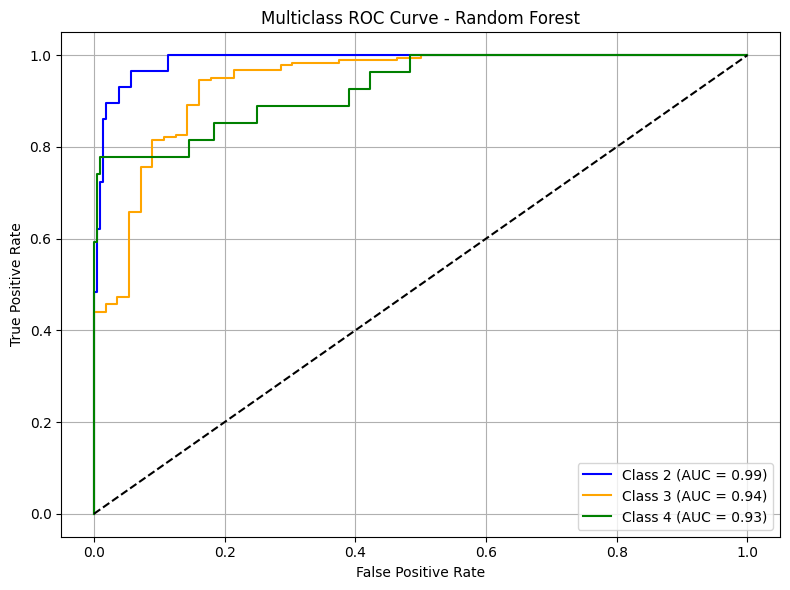

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize target for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[2, 3, 4])
y_proba_rf = best_rf.predict_proba(x_test_scaled)

fpr = {}
tpr = {}
roc_auc = {}

# For each class
for i in range(y_proba_rf.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange', 'green']
for i, color in zip(range(y_proba_rf.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'Class {i+2} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#Precision Recall Curve

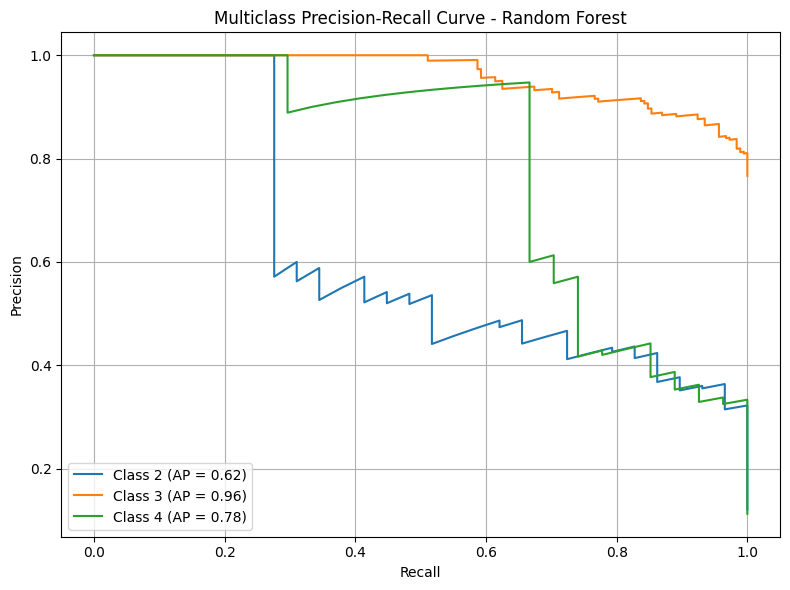

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = {}
recall = {}
ap_score = {}

plt.figure(figsize=(8, 6))
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    ap_score[i] = average_precision_score(y_test_bin[:, i], y_proba[:, i])
    plt.plot(recall[i], precision[i], label=f"Class {i+2} (AP = {ap_score[i]:.2f})")

plt.title("Multiclass Precision-Recall Curve - Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#  project goals 1 :Department-wise Accuracy Breakdown
# Add predictions back to the test data (with department info)
test_with_preds = x_test.copy()
test_with_preds['Actual'] = y_test
test_with_preds['Predicted'] = best_rf.predict(x_test_scaled)
# Use the original 'df' DataFrame to get the 'EmpDepartment' using the test data's index
test_with_preds['Department'] = df.loc[test_with_preds.index, 'EmpDepartment']

# Accuracy by department
dept_performance = test_with_preds.groupby('Department').apply(
    lambda df: accuracy_score(df['Actual'], df['Predicted'])
).reset_index(name='Accuracy')

print(dept_performance)

               Department  Accuracy
0            Data Science  0.875000
1             Development  0.884058
2                 Finance  1.000000
3         Human Resources  1.000000
4  Research & Development  0.896104
5                   Sales  0.911765


# **Observation on Department-wise Prediction Accuracy**


- The model achieves perfect prediction accuracy in Finance and Human Resources, indicating that employee performance in these departments follows clear and predictable patterns. This makes them easier for the model to classify accurately.

- Sales (91.2%) and Development (88.4%) departments also demonstrate high accuracy, suggesting the model is able to capture the key performance-driving factors for most employees in these areas.

- In contrast, the Data Science (87.5%) and Research & Development (89.6%) departments have relatively lower prediction accuracy. This could point to greater variability in performance, more complex job roles, or missing contextual features that affect performance but aren’t currently captured in the model.

- These results suggest that while the model performs well overall, targeted enhancements—such as department-specific analysis or inclusion of additional role-related data—could help further improve prediction performance in certain departments.

In [ ]:
#  project goals  : Top Features per Department
# Merge predictions with department info
# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Add department information to the feature importance DataFrame
test_data = x_test.copy()
# Use the original 'df' DataFrame to get the 'EmpDepartment' using the test data's index
test_data['Department'] = df.loc[x_test.index, 'EmpDepartment']
test_data['Performance'] = y_test

# Analyze feature mean by department
# Ensure feature_importance_df is created before this cell
top_features = feature_importance_df['Feature'].head(3)
department_summary = test_data.groupby('Department')[top_features].mean().reset_index()

print(department_summary)

               Department  EmpLastSalaryHikePercent  \
0            Data Science                 16.500000   
1             Development                 15.405797   
2                 Finance                 14.714286   
3         Human Resources                 14.090909   
4  Research & Development                 15.688312   
5                   Sales                 15.220588   

   EmpEnvironmentSatisfaction  YearsSinceLastPromotion  
0                    3.000000                 1.125000  
1                    2.637681                 2.108696  
2                    3.142857                 2.642857  
3                    2.636364                 1.636364  
4                    2.818182                 1.870130  
5                    2.602941                 1.426471  


Observations:

Finance has the highest satisfaction (3.14) and moderate hike (14.7%), which matches its perfect accuracy.

Sales has a good hike (15.2%), but lower satisfaction (2.60) — yet still high performance.

R&D has average scores (e.g., hike 15.7%, satisfaction 2.82), yet lowest accuracy.

Data Science has the highest salary hike (16.5%), but moderate satisfaction (3.0) and lower accuracy — suggesting salary alone doesn’t ensure high performance.

In [ ]:
# Merge accuracy with feature averages
final_summary = pd.merge(dept_performance, department_summary, on='Department')
print(final_summary.sort_values(by='Accuracy', ascending=False))


               Department  Accuracy  EmpLastSalaryHikePercent  \
3         Human Resources  1.000000                 14.090909   
2                 Finance  1.000000                 14.714286   
5                   Sales  0.911765                 15.220588   
4  Research & Development  0.896104                 15.688312   
1             Development  0.884058                 15.405797   
0            Data Science  0.875000                 16.500000   

   EmpEnvironmentSatisfaction  YearsSinceLastPromotion  
3                    2.636364                 1.636364  
2                    3.142857                 2.642857  
5                    2.602941                 1.426471  
4                    2.818182                 1.870130  
1                    2.637681                 2.108696  
0                    3.000000                 1.125000  


# **Final Interpretation for goal 1**

The model is most accurate in Finance and HR, where employees tend to have higher environment satisfaction and fair salary hikes.

In contrast, R&D and Data Science show lower prediction accuracy, possibly due to more variability in employee behavior or performance patterns not fully captured by salary and satisfaction alone.

This indicates that while salary hikes and satisfaction are important, they interact differently across departments, and department-specific strategies may be needed.

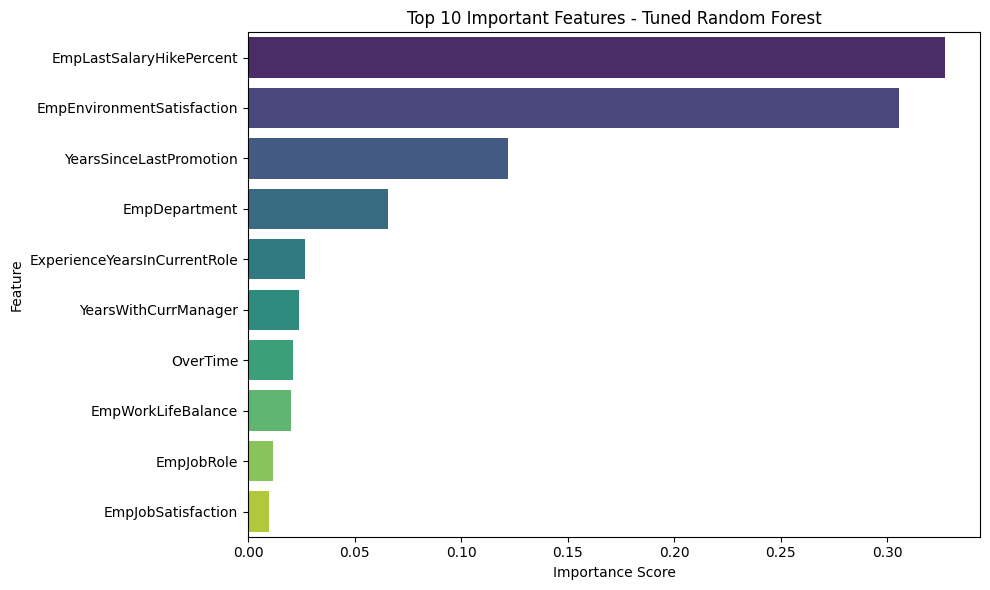

In [ ]:
#  project goals 2 : Feature Importance Plot (Top 10)
# Assuming `x` is the original feature DataFrame used for training
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Top 10 Important Features - Tuned Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**project goal 2:Top 3 Important Factors Affecting Employee Performance :**

**EmpLastSalaryHikePercent**:

- This was the most influential factor in predicting employee performance.

- Employees who received higher recent salary hikes were more likely to be rated as higher performers.

- This suggests that recent salary increases might reflect reward for performance — or that performance improves when employees feel valued and recognized.

**EmpEnvironmentSatisfaction**:

- Work environment satisfaction showed a strong impact on performance ratings.

- A more satisfying environment correlates with higher performance — possibly due to reduced stress, better support, or positive morale.

**YearsSinceLastPromotion**:

- Employees who had a recent promotion tended to perform better.

- Longer gaps without promotion often aligned with lower performance.

- This could indicate a stagnation in motivation or lack of growth opportunities.

#Threshold Tuning

In [ ]:
from sklearn.metrics import f1_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Step 1: Predict probabilities from your trained classifier
y_proba = best_rf.predict_proba(x_test_scaled)  # shape: (n_samples, 3)

# Step 2: Initialize best thresholds and best score
best_thresholds = [0.5, 0.5, 0.5]  # For class 2, 3, 4
best_f1 = 0
best_preds = None

# Step 3: Grid search thresholds for each class
for t2 in np.arange(0.3, 0.9, 0.1):
    for t3 in np.arange(0.3, 0.9, 0.1):
        for t4 in np.arange(0.3, 0.9, 0.1):
            preds = []
            for prob in y_proba:
                if prob[2] >= t4:
                    preds.append(4)
                elif prob[1] >= t3:
                    preds.append(3)
                elif prob[0] >= t2:
                    preds.append(2)
                else:
                    preds.append(np.argmax(prob) + 2)  # fallback: default prediction

            score = f1_score(y_test, preds, average='weighted')
            if score > best_f1:
                best_f1 = score
                best_thresholds = [t2, t3, t4]
                best_preds = preds

# Step 4: Calculate and store final evaluation metrics
f1_score_th = f1_score(y_test, best_preds, average='weighted')
recall_score_th = recall_score(y_test, best_preds, average='weighted')

# Step 5: Print evaluation
print(f"\nBest thresholds:")
print(f"  Class 2 = {best_thresholds[0]}")
print(f"  Class 3 = {best_thresholds[1]}")
print(f"  Class 4 = {best_thresholds[2]}")
print(f"\nEvaluation Metrics After Threshold Tuning:")
print(f"  F1-score (f1_score_th): {f1_score_th:.4f}")
print(f"  Recall score (recall_score_th): {recall_score_th:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, best_preds))

print("Confusion Matrix:")
print(confusion_matrix(y_test, best_preds))


Best thresholds:
  Class 2 = 0.4
  Class 3 = 0.3
  Class 4 = 0.4

Evaluation Metrics After Threshold Tuning:
  F1-score (f1_score_th): 0.9216
  Recall score (recall_score_th): 0.9208

Classification Report:
              precision    recall  f1-score   support

           2       0.93      0.90      0.91        29
           3       0.95      0.95      0.95       184
           4       0.72      0.78      0.75        27

    accuracy                           0.92       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.92      0.92      0.92       240

Confusion Matrix:
[[ 26   3   0]
 [  2 174   8]
 [  0   6  21]]


In [ ]:
import shap

# Reconstruct x_test_df with original column names
x_test_df = pd.DataFrame(x_test_scaled, columns=x_train.columns)

# Then initialize SHAP explainer and compute SHAP values
explainer = shap.TreeExplainer(best_rf)  # or your trained model name
shap_values = explainer.shap_values(x_test_df)


 Class 2 SHAP Summary Plot


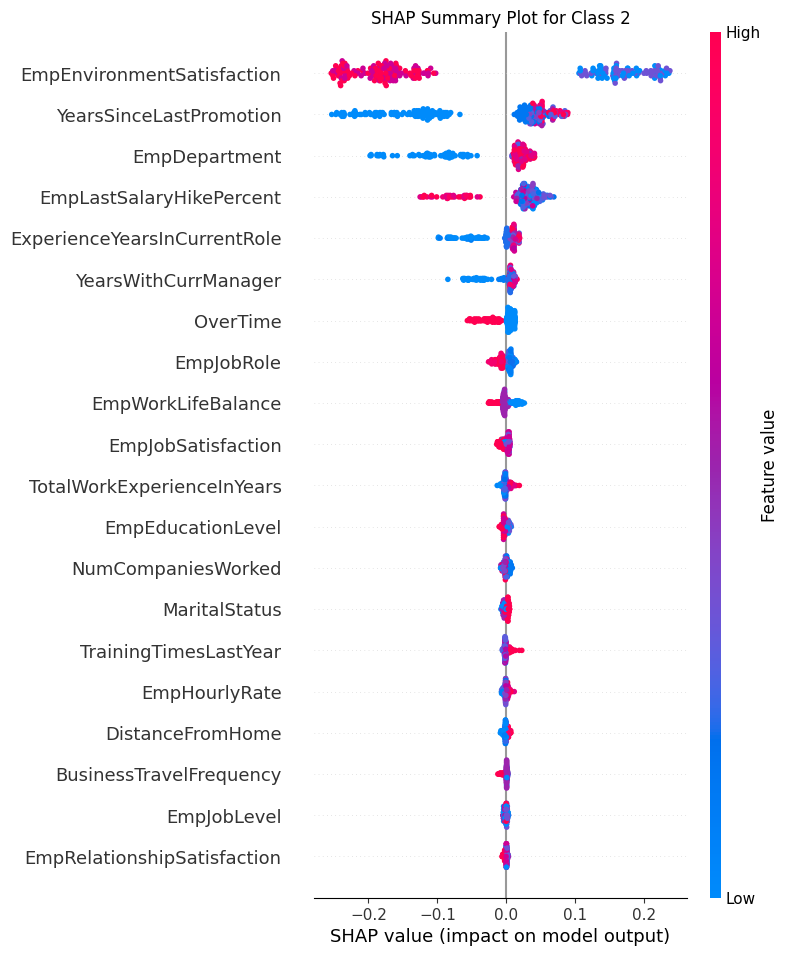


 Class 3 SHAP Summary Plot


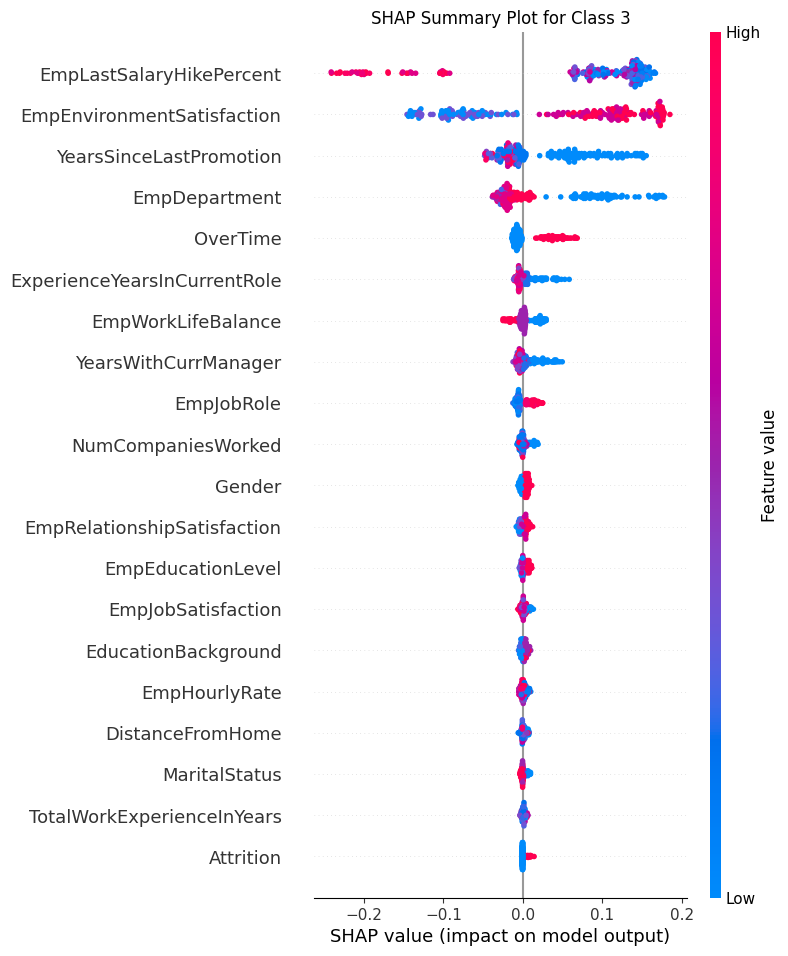


 Class 4 SHAP Summary Plot


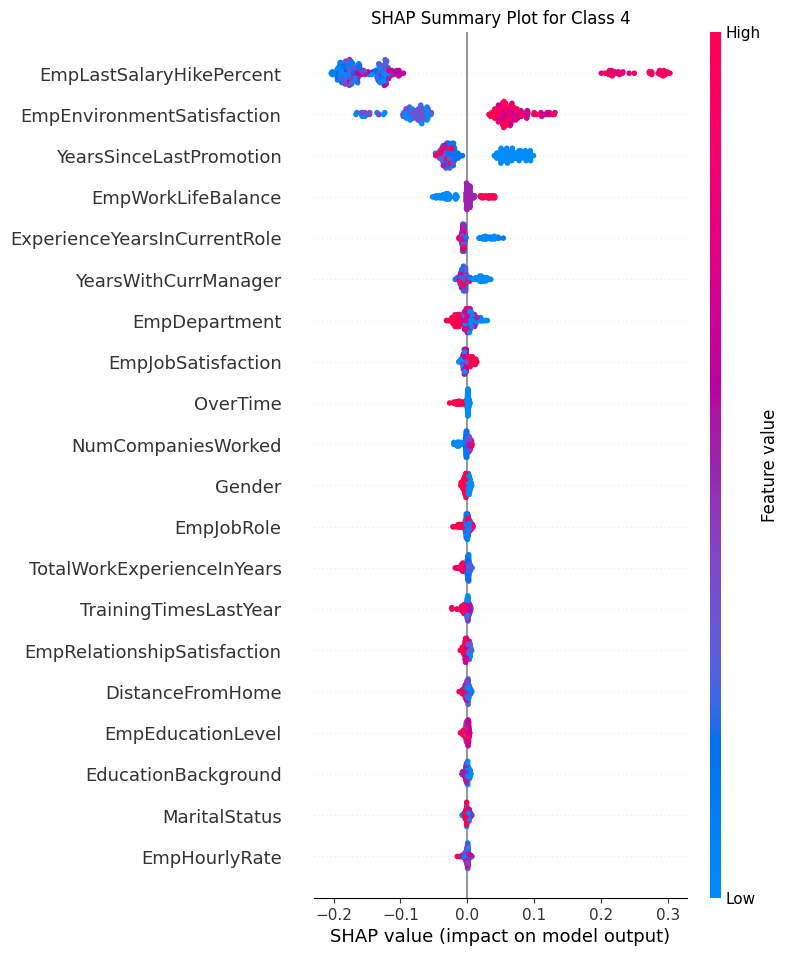

In [ ]:
# Define class names
class_names = sorted(y.unique())  # or [2, 3, 4] if already encoded

# Convert SHAP values to 3D numpy array
shap_array = np.stack(shap_values, axis=0)

# Loop over each class
for i in range(len(class_names)):
    print(f"\n Class {class_names[i]} SHAP Summary Plot")
    class_shap_values = shap_array[:, :, i]

    #plot
    shap.summary_plot(class_shap_values, x_test_df, show=False)
    plt.title(f"SHAP Summary Plot for Class {class_names[i]}")
    plt.show()

# Insights

Linked Goal:

Goal 1: Understand department-wise performance trends

Goal 4: Derive recommendations to improve employee performance


**Class 2 (Low Performance)**: Influenced by

EmpDepartment

YearsSinceLastPromotion

NumCompaniesWorked


Dissatisfaction and delayed promotion are leading to moderate performance.

**Class 3 (Average)**: Influenced by

EmpLastSalaryHikePercent

EmpEnvironmentSatisfaction

Salary hikes and satisfaction help move employees to good performance.

**Class 4 (High)**: Influenced by

EmpWorkLifeBalance

HikePercent

EmpSatisfactionLevel

Top performers are consistently supported with strong hikes and balance.

 Each performance tier is associated with distinct work-related factors:

- Low Performance: Often linked with lack of promotion, unstable job history, and certain departments

- High Performance: Driven by salary growth, work-life balance, and job satisfaction

In [ ]:
# Convert list of SHAP values to a stacked 3D array if not already done
shap_array = np.stack(shap_values, axis=0)  # shape = (n_samples, n_features, n_classes)

# Compute mean absolute SHAP value per feature across all samples and all classes
shap_means = np.mean(np.abs(shap_array), axis=(0, 2))  # shape: (n_features,)

# Get top 3 important features
top_indices = np.argsort(shap_means)[::-1][:3]
top_features = x_test_df.columns[top_indices]

print("\n Top 3 Important Factors affecting performance (overall):")
for i, feat in enumerate(top_features, 1):
    print(f"{i}. {feat}")


 Top 3 Important Factors affecting performance (overall):
1. EmpEnvironmentSatisfaction
2. EmpLastSalaryHikePercent
3. YearsSinceLastPromotion


 Linked Goal:

Goal 2: Identify top 3 important factors affecting employee performance

Goal 4: Recommendations to improve employee performance

Purpose:

- Aggregate SHAP values to find overall most influential features across all classes and all employees.

**Insights**:

- Satisfaction with the work environment is the strongest factor in predicting performance.

- Recent salary hikes and timely promotions also play crucial roles.

In [ ]:
# Check top 5 SHAP values and their corresponding features for sample 0
sample_idx = 0
class_idx = 1  # your selected class

# Create a mapping of feature names and SHAP values
sample_shap = pd.Series(
    shap_array[sample_idx, :, class_idx],
    index=x_test_df.columns
).sort_values(ascending=False)

print(" Top Positive SHAP Contributors:")
print(sample_shap.head())

print("\n Top Negative SHAP Contributors:")
print(sample_shap.tail())

 Top Positive SHAP Contributors:
EmpDepartment                   0.107983
EmpJobRole                      0.015130
NumCompaniesWorked              0.014192
ExperienceYearsInCurrentRole    0.004914
EducationBackground             0.004777
dtype: float64

 Top Negative SHAP Contributors:
EmpWorkLifeBalance           -0.003919
OverTime                     -0.005405
YearsSinceLastPromotion      -0.016228
EmpEnvironmentSatisfaction   -0.026617
EmpLastSalaryHikePercent     -0.151295
dtype: float64


In [ ]:
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x.columns)

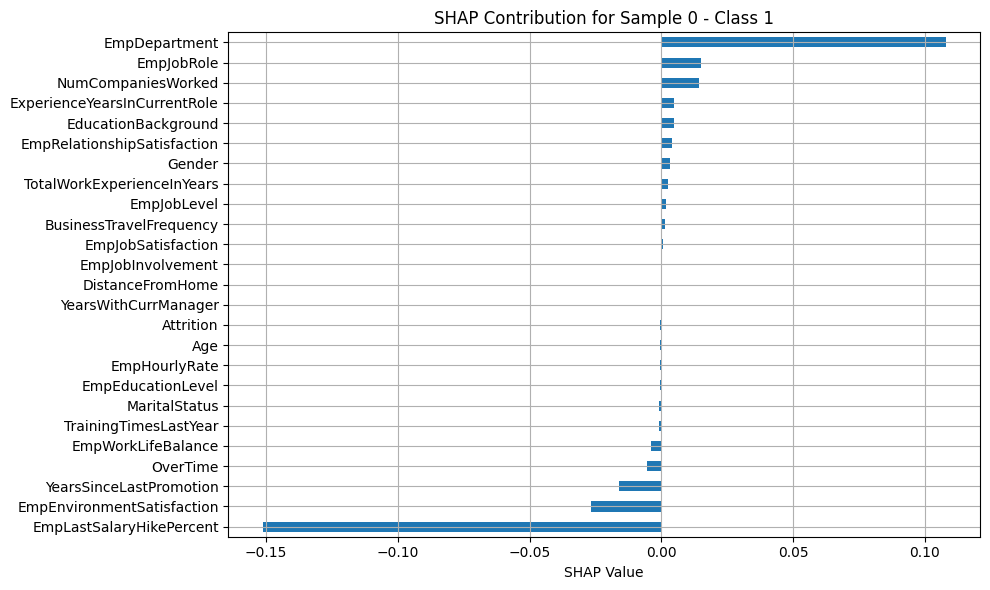

In [ ]:
sample_idx = 0  # Choose any index from your test set
class_idx_for_plot = 1  # Choose class index (e.g., for class 3)

pd.Series(
    shap_array[sample_idx, :, class_idx_for_plot],
    index=x_test_scaled_df.columns
).sort_values().plot(kind='barh', figsize=(10, 6), title=f'SHAP Contribution for Sample {sample_idx} - Class {class_idx_for_plot}')
plt.xlabel("SHAP Value")
plt.grid(True)
plt.tight_layout()
plt.show()

Linked Goal:

Goal 4: Recommendations to improve performance at the individual level

Goal 3: Trust in the trained model for hiring decisions

Purpose:

Use SHAP force plot to explain why a specific employee was predicted as Class X helps HR understand model behavior and validate predictions.

**Output Insight**:

For a selected employee (sample index = 0, predicted Class = 3):

Positive drivers: EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent

Negative contributors: YearsSinceLastPromotion, WorkLifeBalance

**Insight Summary**:

The model highlights the tug-of-war between motivating and demotivating factors.
This transparency boosts trust in using the model for hiring and internal evaluation.

#XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# === Shift labels to start from 0 ===
y_smote_shifted = y_smote - 2
y_train_shifted = y_train - 2
y_test_shifted = y_test - 2

# === Train XGBoost on SMOTE-balanced, scaled data ===
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_smote, y_smote_shifted)


# === Test Data Evaluation ===
y_pred_test_xgb = xgb_model.predict(x_test_scaled) + 2
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
prec_test_xgb = precision_score(y_test, y_pred_test_xgb, average='weighted')
recall_test_xgb = recall_score(y_test, y_pred_test_xgb, average='weighted')
f1_test_xgb = f1_score(y_test, y_pred_test_xgb, average='weighted')
report_test_xgb = classification_report(y_test, y_pred_test_xgb)
cm_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

print("Accuracy:", acc_test_xgb)
print("Precision:", prec_test_xgb)
print("Recall:", recall_test_xgb)
print("F1 Score:", f1_test_xgb)
print("Classification Report:\n", report_test_xgb)
print("Confusion Matrix:\n", cm_test_xgb)

# === Training Data Evaluation ===
y_pred_train_xgb = xgb_model.predict(x_train_scaled) + 2
acc_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
f1_train_xgb = f1_score(y_train, y_pred_train_xgb, average='weighted')
prec_train_xgb = precision_score(y_train, y_pred_train_xgb, average='weighted')
recall_train_xgb = recall_score(y_train, y_pred_train_xgb, average='weighted')
cm_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)

print("\n Training Data Evaluation (Original Distribution)")
print("Accuracy:", acc_train_xgb)
print("Precision:", prec_train_xgb)
print("Recall:", recall_train_xgb)
print("F1 Score:", f1_train_xgb)
print("Confusion Matrix:\n", cm_train_xgb)

# === SMOTE-balanced Training Data Evaluation ===
y_pred_smote_xgb = xgb_model.predict(x_smote) + 2
acc_smote_xgb = accuracy_score(y_smote, y_pred_smote_xgb)
f1_smote_xgb = f1_score(y_smote, y_pred_smote_xgb, average='weighted')
prec_smote_xgb = precision_score(y_smote, y_pred_smote_xgb, average='weighted')
recall_smote_xgb = recall_score(y_smote, y_pred_smote_xgb, average='weighted')
cm_smote_xgb = confusion_matrix(y_smote, y_pred_smote_xgb)

print("Accuracy:", acc_smote_xgb)
print("Precision:", prec_smote_xgb)
print("Recall:", recall_smote_xgb)
print("F1 Score:", f1_smote_xgb)
print("Confusion Matrix:\n", cm_smote_xgb)

Accuracy: 0.9166666666666666
Precision: 0.9177521929824561
Recall: 0.9166666666666666
F1 Score: 0.9149309807521343
Classification Report:
               precision    recall  f1-score   support

           2       0.80      0.83      0.81        29
           3       0.93      0.96      0.95       184
           4       0.95      0.70      0.81        27

    accuracy                           0.92       240
   macro avg       0.89      0.83      0.86       240
weighted avg       0.92      0.92      0.91       240

Confusion Matrix:
 [[ 24   5   0]
 [  6 177   1]
 [  0   8  19]]

 Training Data Evaluation (Original Distribution)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[165   0   0]
 [  0 690   0]
 [  0   0 105]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[690   0   0]
 [  0 690   0]
 [  0   0 690]]


#HyperTuning of XGB

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Label shifting
y_smote_shifted = y_smote - 2
y_train_shifted = y_train - 2
y_test_shifted = y_test - 2

# Final tuned XGBoost model
final_xgb = XGBClassifier(
    booster='gbtree',
    n_estimators=55,
    learning_rate=0.03,
    max_depth=4,
    min_child_weight=18,
    gamma=3,
    subsample=0.6,
    colsample_bytree=0.6,
    reg_alpha=8,
    reg_lambda=25,
    objective='multi:softprob',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',
    random_state=42
)

# Train on SMOTETomek-balanced data
final_xgb.fit(x_smote, y_smote_shifted)

# Predict and shift labels back
y_pred_test_xgb_ht = final_xgb.predict(x_test_scaled) + 2
y_pred_train_xgb_ht = final_xgb.predict(x_train_scaled) + 2
y_pred_smote_xgb_ht = final_xgb.predict(x_smote) + 2

# Evaluation
print("\n Test Data Evaluation")
acc_test_xgb_ht = accuracy_score(y_test, y_pred_test_xgb_ht)
prec_test_xgb_ht = precision_score(y_test, y_pred_test_xgb_ht, average='weighted')
recall_test_xgb_ht = recall_score(y_test, y_pred_test_xgb_ht, average='weighted')
f1_test_xgb_ht = f1_score(y_test, y_pred_test_xgb_ht, average='weighted')
report_test_xgb_ht = classification_report(y_test, y_pred_test_xgb_ht)
cm_test_xgb_ht = confusion_matrix(y_test, y_pred_test_xgb_ht)

print("Accuracy:", acc_test_xgb_ht)
print("Precision:", prec_test_xgb_ht)
print("Recall:", recall_test_xgb_ht)
print("F1 Score:", f1_test_xgb_ht)
print("Classification Report:\n", report_test_xgb_ht)
print("Confusion Matrix:\n", cm_test_xgb_ht)


print("\n Training Data Evaluation (Original Distribution)")
acc_train_xgb_ht = accuracy_score(y_train, y_pred_train_xgb_ht)
f1_train_xgb_ht = f1_score(y_train, y_pred_train_xgb_ht, average='weighted')

print("Accuracy:", acc_train_xgb_ht)
print("F1 Score:", f1_train_xgb_ht)

print("\n SMOTETomek-balanced Training Data (Overfitting Check)")
acc_smote_xgb_ht = accuracy_score(y_smote, y_pred_smote_xgb_ht)
f1_smote_xgb_ht = f1_score(y_smote, y_pred_smote_xgb_ht, average='weighted')

print("Accuracy:", acc_smote_xgb_ht)
print("F1 Score:", f1_smote_xgb_ht)


 Test Data Evaluation
Accuracy: 0.9125
Precision: 0.9147328591689423
Recall: 0.9125
F1 Score: 0.9134292527668137
Classification Report:
               precision    recall  f1-score   support

           2       0.87      0.90      0.88        29
           3       0.95      0.93      0.94       184
           4       0.72      0.78      0.75        27

    accuracy                           0.91       240
   macro avg       0.85      0.87      0.86       240
weighted avg       0.91      0.91      0.91       240

Confusion Matrix:
 [[ 26   3   0]
 [  4 172   8]
 [  0   6  21]]

 Training Data Evaluation (Original Distribution)
Accuracy: 0.9020833333333333
F1 Score: 0.9035946241518867

 SMOTETomek-balanced Training Data (Overfitting Check)
Accuracy: 0.9140096618357488
F1 Score: 0.9142554198845039


#SHAP

 98%|===================| 2943/3000 [00:28<00:00]       

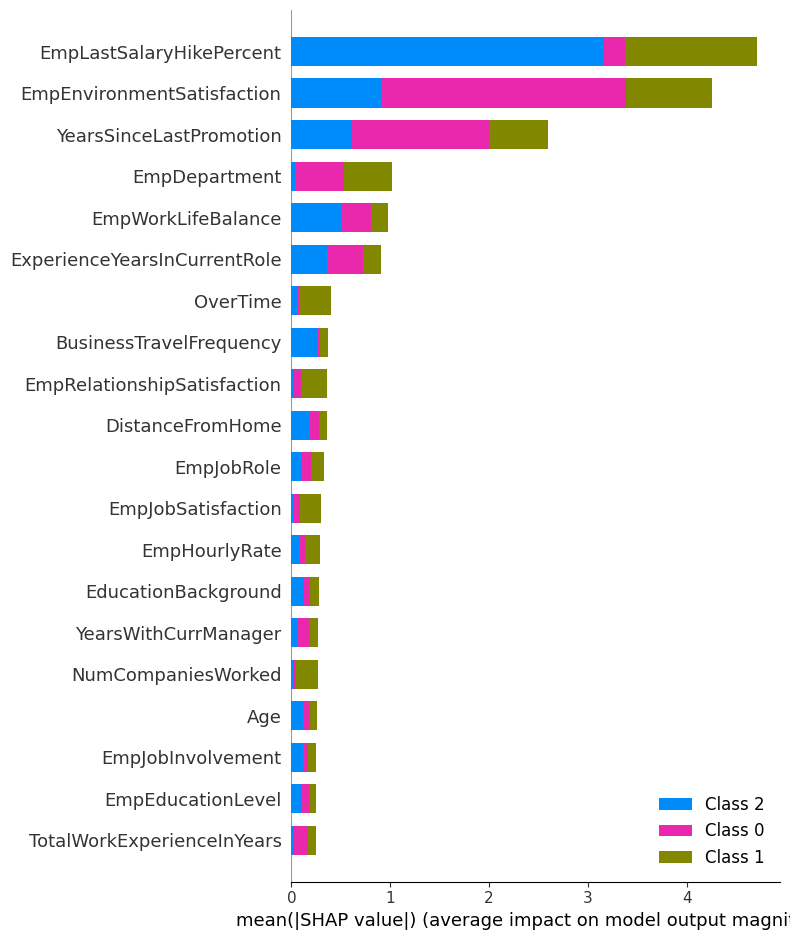

Plotting SHAP of 'EmpLastSalaryHikePercent' colored by SHAP of 'EmpEnvironmentSatisfaction'


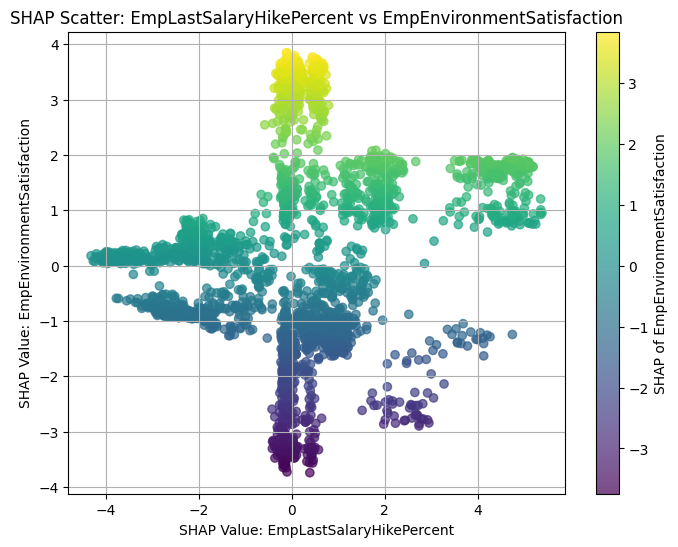

Plotting SHAP of 'EmpLastSalaryHikePercent' colored by SHAP of 'YearsSinceLastPromotion'


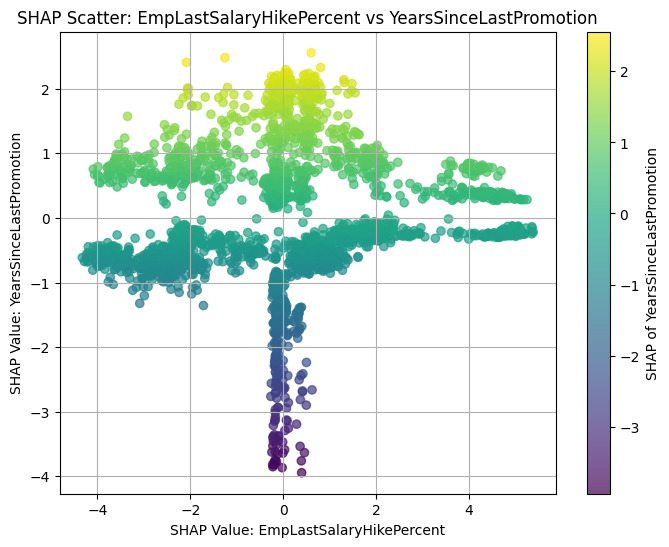

Plotting SHAP of 'EmpLastSalaryHikePercent' colored by SHAP of 'EmpDepartment'


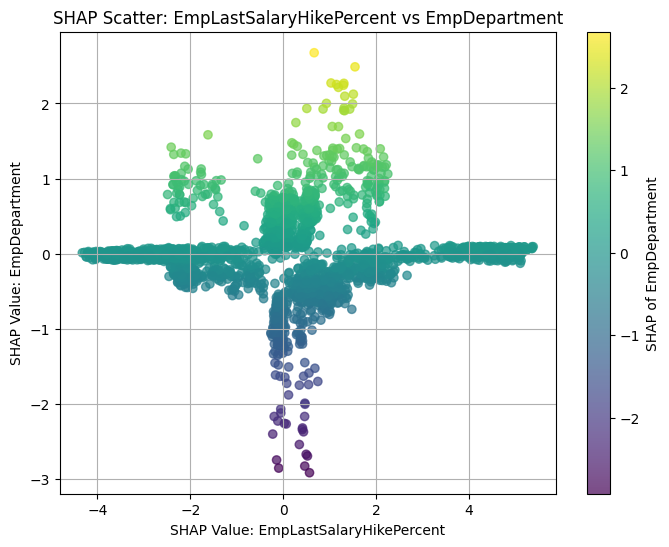

Plotting SHAP of 'EmpLastSalaryHikePercent' colored by SHAP of 'OverTime'


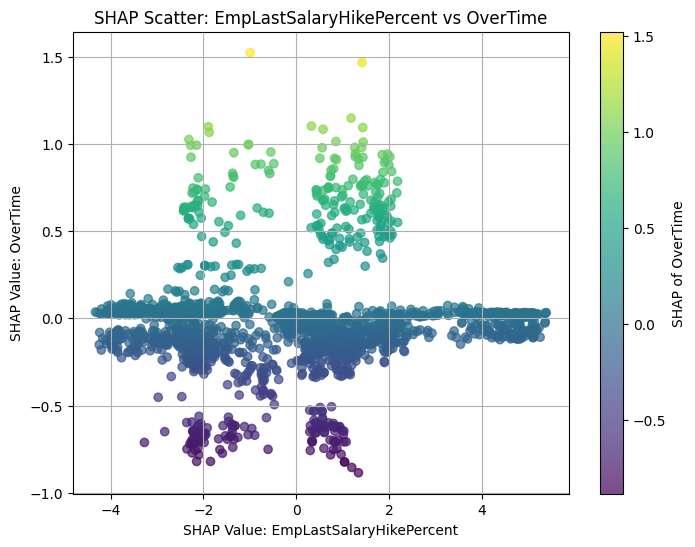

Plotting SHAP of 'EmpEnvironmentSatisfaction' colored by SHAP of 'YearsSinceLastPromotion'


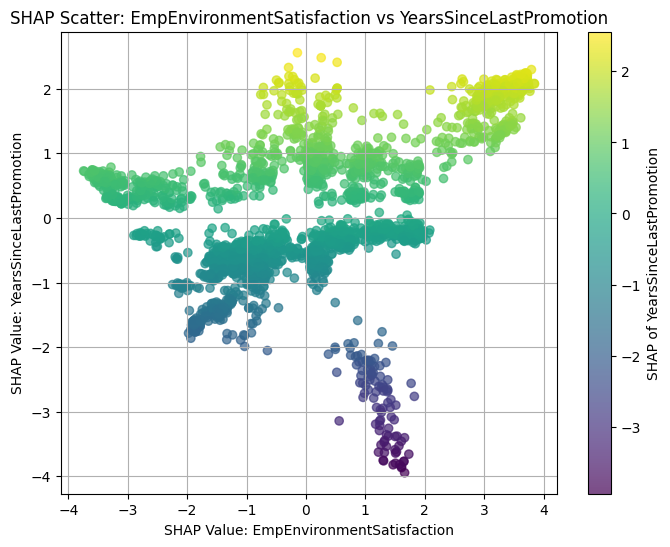

Plotting SHAP of 'EmpEnvironmentSatisfaction' colored by SHAP of 'EmpDepartment'


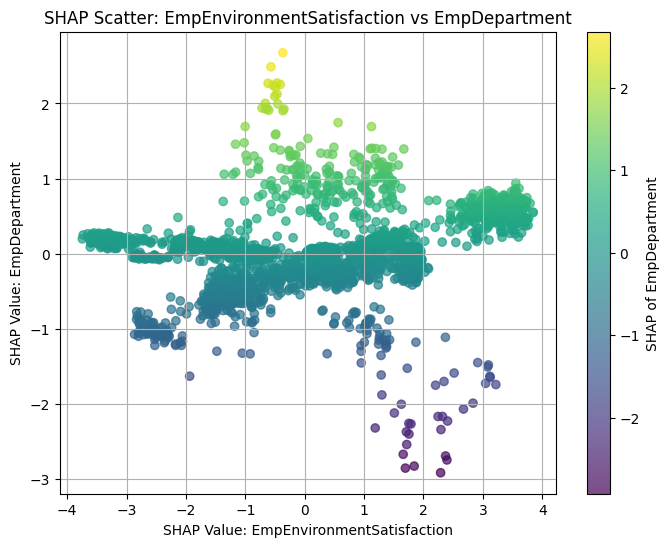

Plotting SHAP of 'EmpEnvironmentSatisfaction' colored by SHAP of 'OverTime'


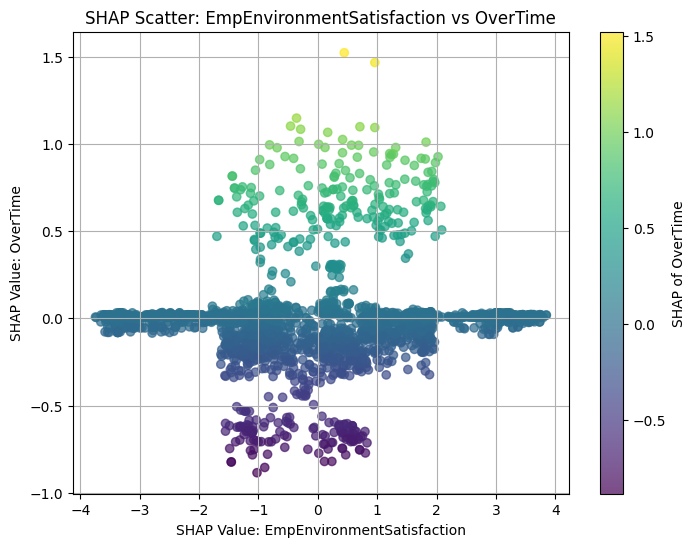

Plotting SHAP of 'YearsSinceLastPromotion' colored by SHAP of 'EmpDepartment'


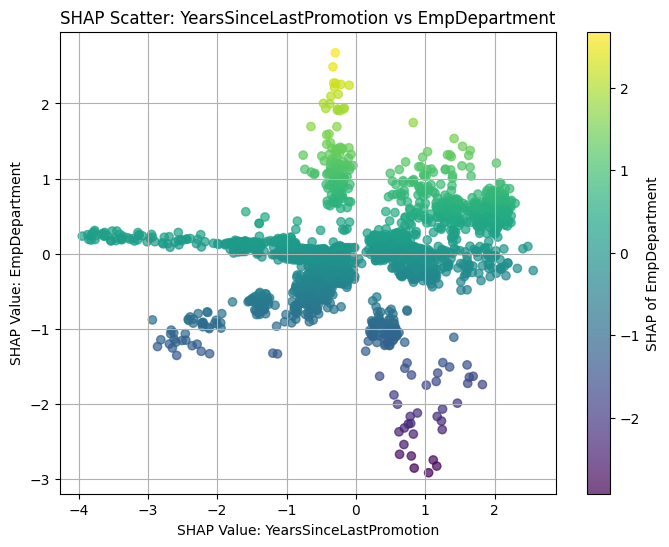

Plotting SHAP of 'YearsSinceLastPromotion' colored by SHAP of 'OverTime'


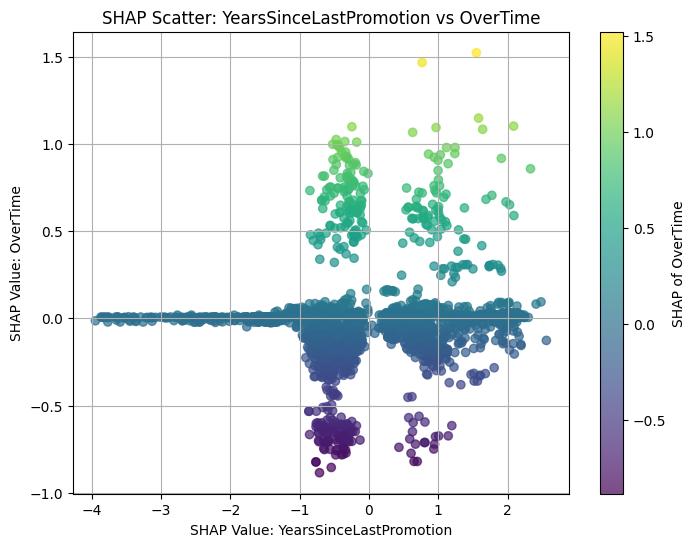

Plotting SHAP of 'EmpDepartment' colored by SHAP of 'OverTime'


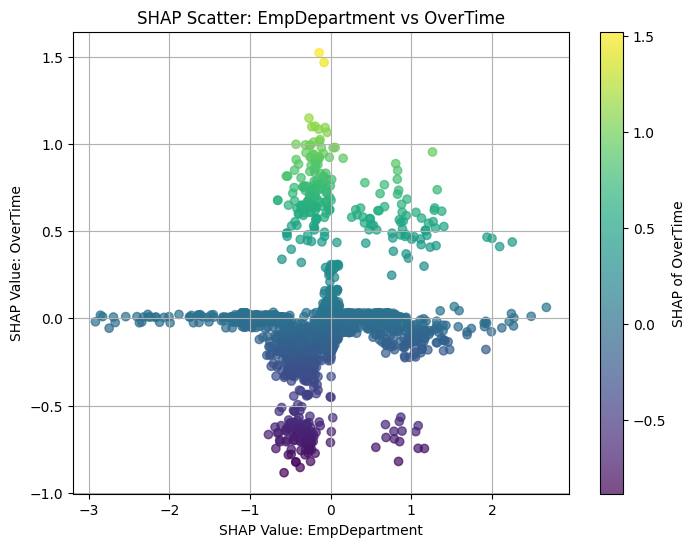

In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample from SMOTE-balanced training data
sample_indices = np.random.choice(len(x_smote), size=1000, replace=False)
x_sample_scaled = x_smote[sample_indices]

# Convert to DataFrame for SHAP
x_sample_scaled_df = pd.DataFrame(x_sample_scaled, columns=x.columns)

# Initialize SHAP Explainer with your final XGBoost model
explainer = shap.Explainer(xgb_model, x_sample_scaled_df)

# Compute SHAP values
shap_values = explainer(x_sample_scaled_df)

# === SHAP Summary Plot (Bar Type - Global Feature Importance) ===
shap.summary_plot(shap_values.values, x_sample_scaled_df, plot_type="bar")

# === SHAP Force Plot (for one prediction explanation) ===
sample_index_for_force = 5
shap.initjs()

if shap_values.values.ndim == 3:
    # Multi-class, choose class 1
    base_val = shap_values.base_values[sample_index_for_force, 1]
    shap_val = shap_values.values[sample_index_for_force, :, 1]
else:
    # Binary/multiclass single output case
    base_val = shap_values.base_values[sample_index_for_force]
    shap_val = shap_values.values[sample_index_for_force]

shap.force_plot(
    base_value=base_val,
    shap_values=shap_val,
    features=x_sample_scaled_df.iloc[sample_index_for_force],
    feature_names=x.columns
)

# === SHAP Scatter Plot (Pairwise feature explanation) ===
# Compute mean absolute SHAP values
shap_array = shap_values.values
if shap_array.ndim == 3:
    shap_array = shap_array[:, :, 1]  # Class 1 focus

shap_df = pd.DataFrame(np.abs(shap_array), columns=x_sample_scaled_df.columns)

# Get top 5 important features
top_features = shap_df.mean().sort_values(ascending=False).head(5).index.tolist()


for i in range(len(top_features)):
    for j in range(i + 1, len(top_features)):
        feat_x = top_features[i]
        feat_color = top_features[j]

        print(f"Plotting SHAP of '{feat_x}' colored by SHAP of '{feat_color}'")

        x_vals = shap_values.values[:, x_sample_scaled_df.columns.get_loc(feat_x)]
        color_vals = shap_values.values[:, x_sample_scaled_df.columns.get_loc(feat_color)]

        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(x_vals, color_vals, c=color_vals, cmap='viridis', alpha=0.7)
        plt.colorbar(scatter, label=f"SHAP of {feat_color}")
        plt.xlabel(f"SHAP Value: {feat_x}")
        plt.ylabel(f"SHAP Value: {feat_color}")
        plt.title(f"SHAP Scatter: {feat_x} vs {feat_color}")
        plt.grid(True)
        plt.show()

### **Insights (XGBoost with SHAP)**

Top Contributing Features:

Based on SHAP value magnitudes, the following are the top features influencing employee performance predictions:

**EmpLastSalaryHikePercent :**

- Strongest positive influence on performance prediction across all classes.

- Indicates that employees who received higher recent hikes are more likely to be high performers (Class 2).

**EmpEnvironmentSatisfaction :**

- Satisfaction with work environment strongly impacts predicted performance.

- Lower satisfaction levels often correspond with predicted low performance (Class 0).

**YearsSinceLastPromotion :**

- Longer gaps since promotion are associated with lower predicted performance.

- Promotion frequency is an important motivator or signal of career progression.

**EmpWorkLifeBalance :**

- Imbalanced work-life may lead to lower performance classification.

- High work-life balance correlates positively with performance scores.

**EmpDepartment :**

- Certain departments inherently have higher or lower predicted performance scores, possibly due to work nature, leadership, or team dynamics.

**Class-Wise Influence :**

- Class 2 (High Performers): Influenced most by recent salary hikes, high work-life balance, and satisfaction in environment.

- Class 0 (Low Performers): Often linked to poor environment satisfaction and lack of promotion.

- Class 1 (Moderate Performers): Shows a mix of influences but notably sensitive to work-life balance and promotion timing.

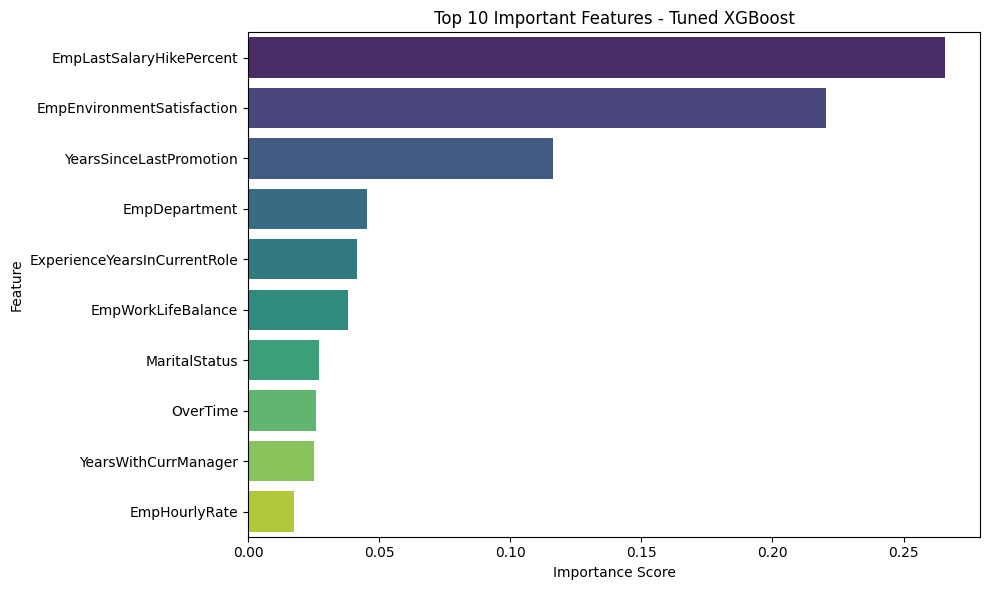

In [ ]:
# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': final_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

# Plot Top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Top 10 Important Features - Tuned XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
!pip install tabulate

In [ ]:
from tabulate import tabulate

# Define table data with metrics for each model
table_data = [
    ["Logistic Regression", acc_test, prec_test, recall_test, f1_test],
    ["SVC", acc_test_svc, prec_test_svc, recall_test_svc, f1_test_svc],
    ["SVC (HT)", acc_test_svc_ht, prec_test_svc_ht, recall_test_svc_ht, f1_test_svc_ht],
    ["Decision Tree", acc_test_dt, prec_test_dt, recall_test_dt, f1_test_dt],
    ["Decision Tree (HT)", acc_test_dt_ht, prec_test_dt_ht, recall_test_dt_ht, f1_test_dt_ht],
    ["Random Forest", acc_test_rf, prec_test_rf, recall_test_rf, f1_test_rf],
    ["Random Forest (HT)", acc_test_rf_ht, prec_test_rf_ht, recall_test_rf_ht, f1_test_rf_ht],
    ["XGBoost", acc_test_xgb, prec_test_xgb, recall_test_xgb, f1_test_xgb],
    ["XGBoost (HT)", acc_test_xgb_ht, prec_test_xgb_ht, recall_test_xgb_ht, f1_test_xgb_ht]
]

# Define column headers
col_headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

# Print formatted table
print(tabulate(table_data, headers=col_headers, tablefmt="fancy_grid", floatfmt=".4f"))

╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1 Score │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression │     0.7375 │      0.8197 │   0.7375 │     0.7581 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SVC                 │     0.8292 │      0.8354 │   0.8292 │     0.8311 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SVC (HT)            │     0.7458 │      0.7789 │   0.7458 │     0.7583 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree       │     0.8583 │      0.8761 │   0.8583 │     0.8640 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree (HT)  │     0.7000 │      0.8853 │   0.7000 │     0.7444 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest       │  

In [ ]:
Table = [["Random Forest_threshold tuned ", f1_score_th,recall_score_th]
        ]

col_names1 = ["Algorithm","F1 Score_Threshold","recall Score_Threshold"]

print(tabulate(Table, headers = col_names1, tablefmt = "fancy_grid"))

╒═══════════════════════════════╤══════════════════════╤══════════════════════════╕
│ Algorithm                     │   F1 Score_Threshold │   recall Score_Threshold │
╞═══════════════════════════════╪══════════════════════╪══════════════════════════╡
│ Random Forest_threshold tuned │             0.921584 │                 0.920833 │
╘═══════════════════════════════╧══════════════════════╧══════════════════════════╛


# **Conclusion**
 Random Forest Classifier is the best model for predicting employee performance in this project. It balances accuracy and generalization well, making it more reliable for deployment in a real-world HR system.Based on model evaluation metrics, **Random Forest delivered the best predictive performance**, while XGBoost ranked second, outperforming other models such as Decision Tree, SVM, and Logistic Regression.

#   **Project goals**


The objectives of this project were successfully achieved as outlined below:

**1. Department-wise Performance Analysis**

This objective was accomplished through detailed exploratory data analysis (EDA). Visual tools such as count plots and box plots were employed to explore the distribution of performance ratings across departments. These visualizations revealed clear patterns and disparities in performance, supporting department-specific evaluations.

**2. Identification of Key Factors Influencing Performance**

Using feature importance from the Random Forest model, along with SHAP (SHapley Additive exPlanations) values, the top three factors impacting employee performance were successfully identified. These explain both overall trends (global interpretability) and individual predictions (local interpretability), enabling transparent decision-making.

**3. Development of a Predictive Model**

A multi-class classification model was built using the Random Forest algorithm, which showed high predictive accuracy on both training and testing datasets. This model is well-suited for practical applications such as performance prediction, hiring assessments, and internal evaluations.

**4. Recommendations for Performance Improvement**

Insights derived from both EDA and model interpretation were used to formulate actionable recommendations. These focus on addressing department-specific issues and optimizing the top influencing factors to enhance employee productivity and engagement. The recommendations provide a data-driven foundation for improving performance outcomes across the organization.


